In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import polars as ps
import pandas as pd
import scipy as sp

In [2]:
WS = pd.read_excel('./Dados_C100_patricio.xlsx')
df_c100 = ps.DataFrame(WS)
#WS = pd.read_excel('./Tensão_vs_SoC_C100.xlsx')
#df_soc = ps.DataFrame(WS)

In [3]:
points100A = [
36,
17299,
34586,
51912,
69298,
86728,
104172,
121666,
139361,
157114,]

points28A = [
4483,
21738,
39026,
56352,
73738,
91168,
108612,
126106,
143801,
161554,]

points3A = [
2267,
19523,
36810,
54136,
71522,
88952,
106396,
123890,
141585,
159338,]

In [4]:
def modelo_2rc(t, v0, v1, v2, t1, t2):
    return v0+v1*np.exp(-t*t1)+v2*np.exp(-t*t2)

In [5]:
def get_t_v(p1, df):
    p1, p2 = p1, p1+200
    corrente = df['Corrente [A]'][p1-1]
    v_zp1 = df['Tensão [V]'][p1-1]

    df_teste = df[p1:p2][['Tempo [s]', 'Tensão [V]']].clone()
    df_teste = df_teste.select([ps.col('Tempo [s]').alias('t'), ps.col('Tensão [V]').alias('v')])

    vmin = df_teste['v'].min()
    vmax = df_teste['v'].max()

    df_teste['t'] = df_teste['t']-df_teste['t'][0]
    df_teste['v'] = df_teste['v']-df_teste['v'][0]

    t = df_teste['t'].to_numpy()
    v = df_teste['v'].to_numpy()
    return t, v, corrente, vmin, vmax, v_zp1

Curva 0: -100 A
3.343 v_max, 3.321 v_min, 2.20000e-02 ΔV
3.287 v_r0, 3.39993e-04 r0
2.179e-02 v0, -1.588e-02 v1, -5.24650e-03 v2
2.517e+01 t1, 1.588e-04 r1, 1.585e+05 c1
3.587e+02 t2, 5.246e-05 r2, 6.838e+06 c2 



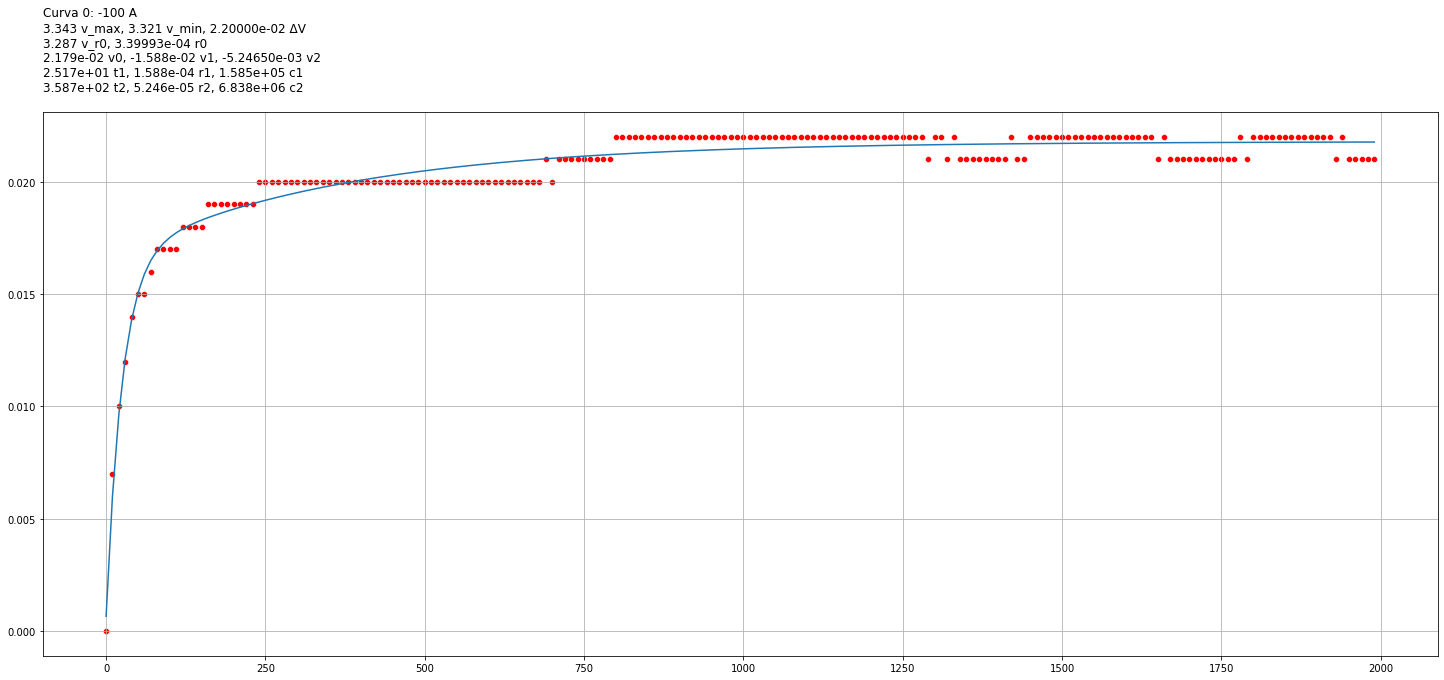

Curva 1: -100 A
3.319 v_max, 3.287 v_min, 3.20000e-02 ΔV
3.254 v_r0, 3.29993e-04 r0
3.193e-02 v0, -2.116e-02 v1, -9.80517e-03 v2
3.139e+01 t1, 2.116e-04 r1, 1.484e+05 c1
4.711e+02 t2, 9.805e-05 r2, 4.805e+06 c2 



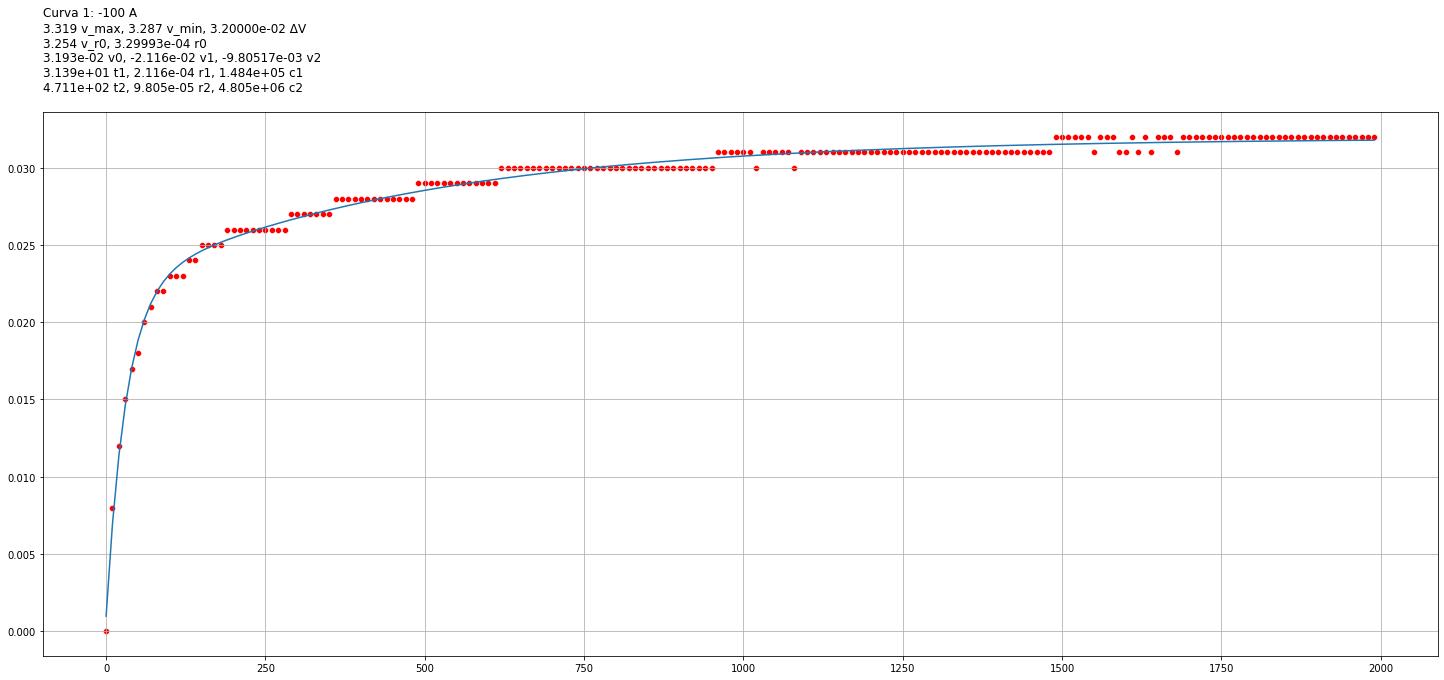

Curva 2: -100 A
3.317 v_max, 3.279 v_min, 3.80000e-02 ΔV
3.245 v_r0, 3.39993e-04 r0
3.855e-02 v0, -2.371e-02 v1, -1.25697e-02 v2
4.123e+01 t1, 2.371e-04 r1, 1.739e+05 c1
6.895e+02 t2, 1.257e-04 r2, 5.486e+06 c2 



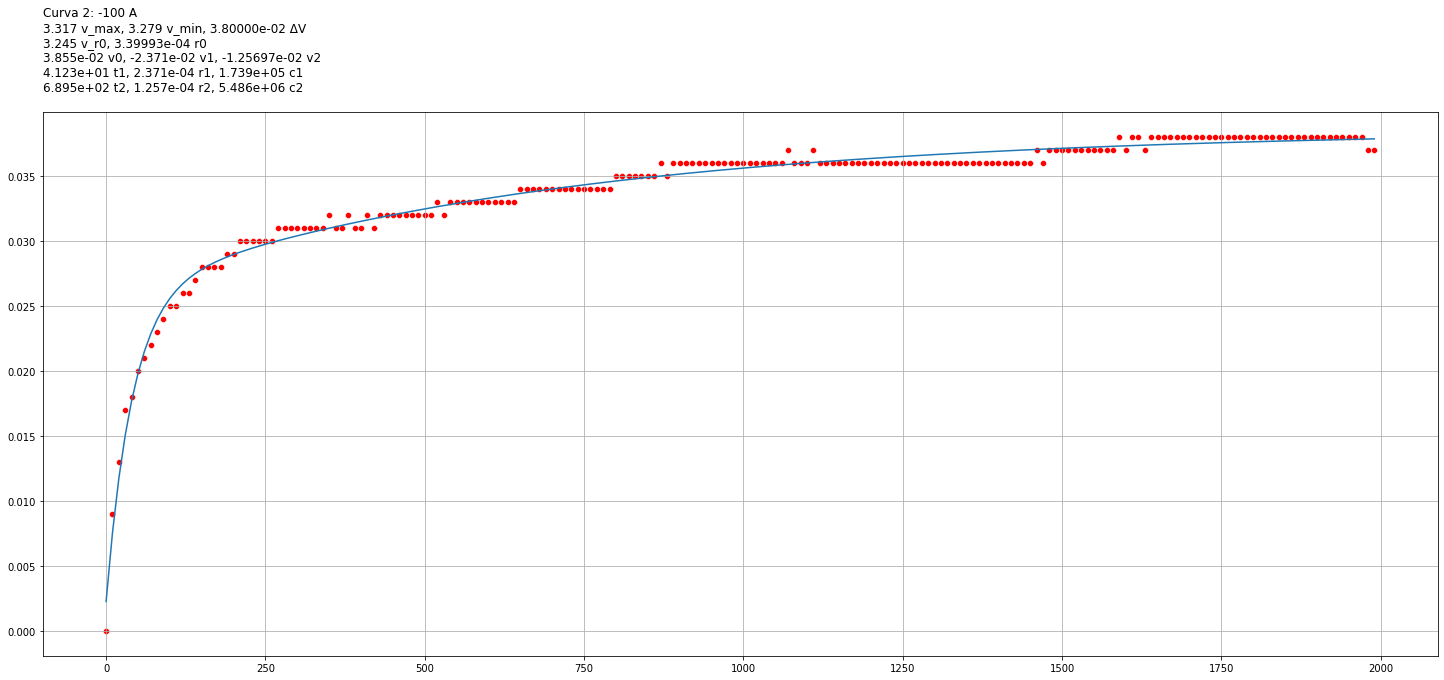

Curva 3: -100 A
3.304 v_max, 3.26 v_min, 4.40000e-02 ΔV
3.225 v_r0, 3.49993e-04 r0
4.619e-02 v0, -2.121e-02 v1, -2.30045e-02 v2
4.029e+01 t1, 2.121e-04 r1, 1.899e+05 c1
9.656e+02 t2, 2.300e-04 r2, 4.197e+06 c2 



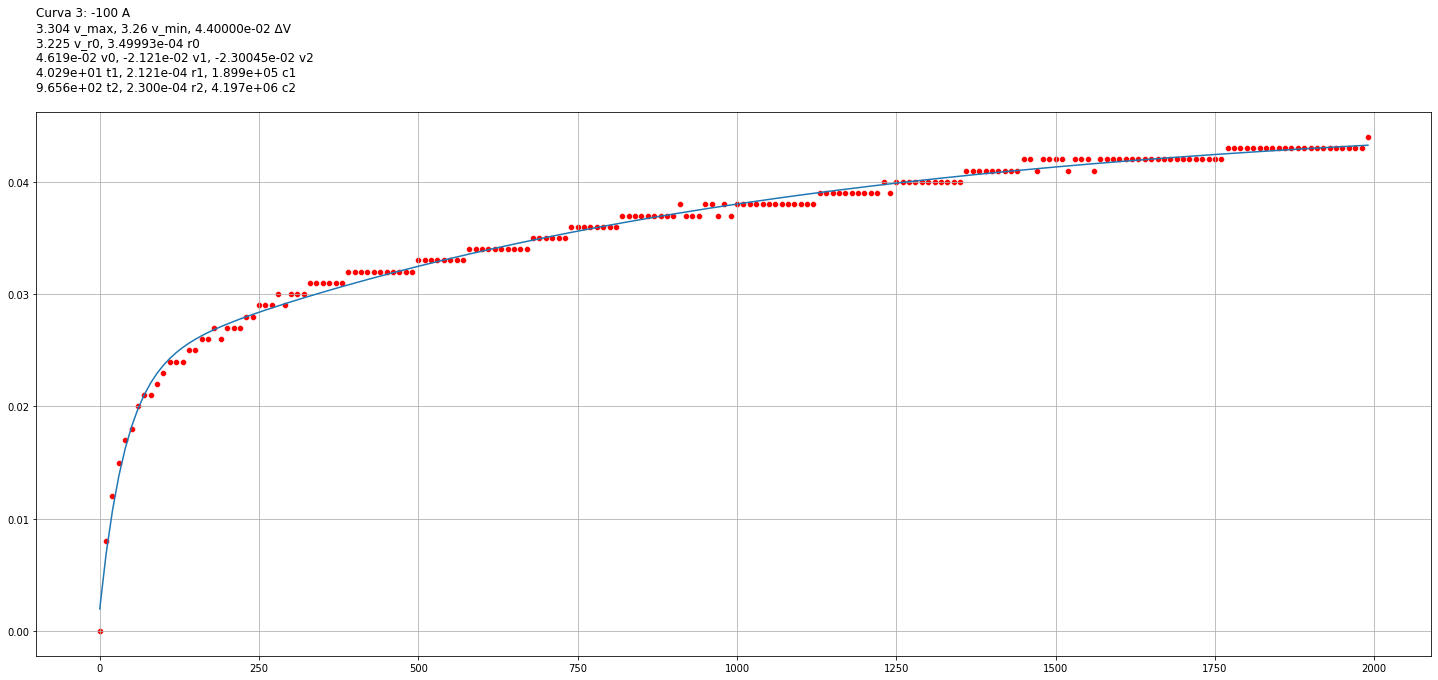

Curva 4: -100 A
3.28 v_max, 3.249 v_min, 3.10000e-02 ΔV
3.215 v_r0, 3.39993e-04 r0
3.082e-02 v0, -2.006e-02 v1, -9.35524e-03 v2
2.870e+01 t1, 2.006e-04 r1, 1.431e+05 c1
6.579e+02 t2, 9.355e-05 r2, 7.032e+06 c2 



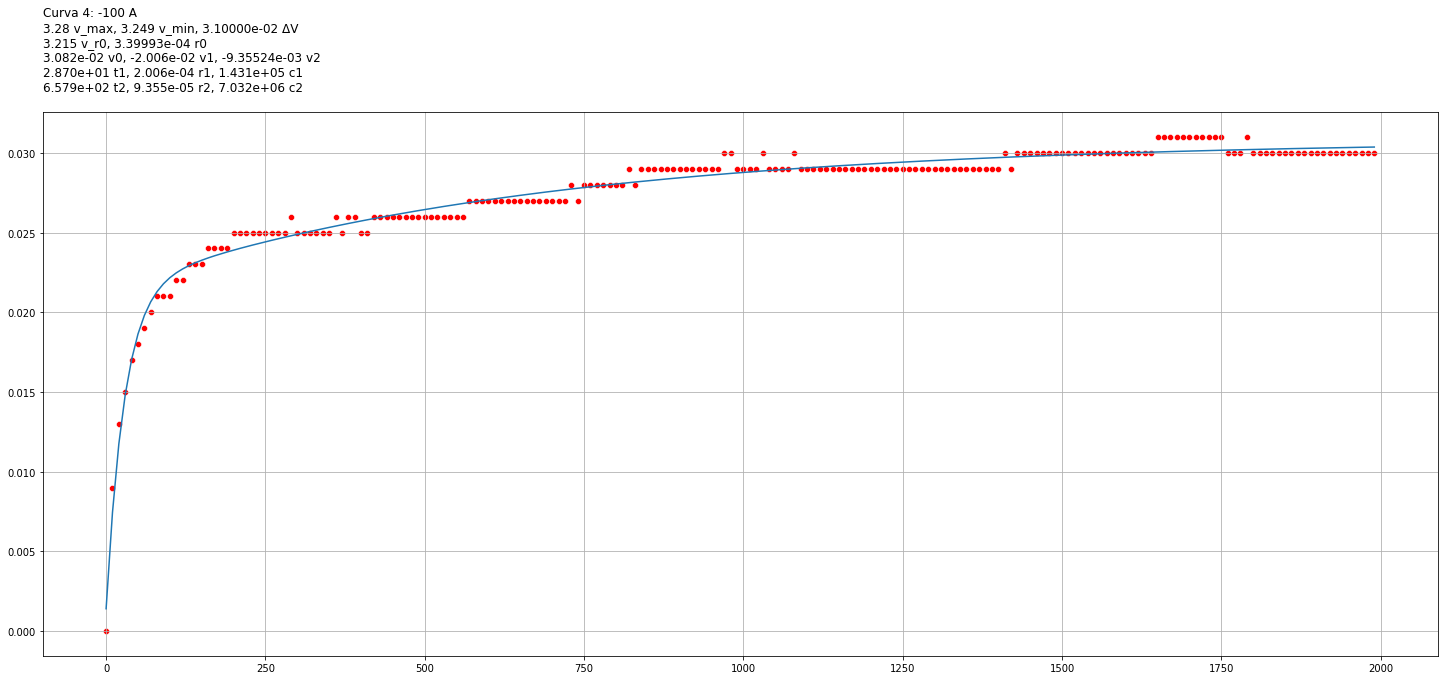

Curva 5: -100 A
3.276 v_max, 3.242 v_min, 3.40000e-02 ΔV
3.207 v_r0, 3.49993e-04 r0
3.400e-02 v0, -2.127e-02 v1, -1.09341e-02 v2
2.984e+01 t1, 2.127e-04 r1, 1.403e+05 c1
5.772e+02 t2, 1.093e-04 r2, 5.279e+06 c2 



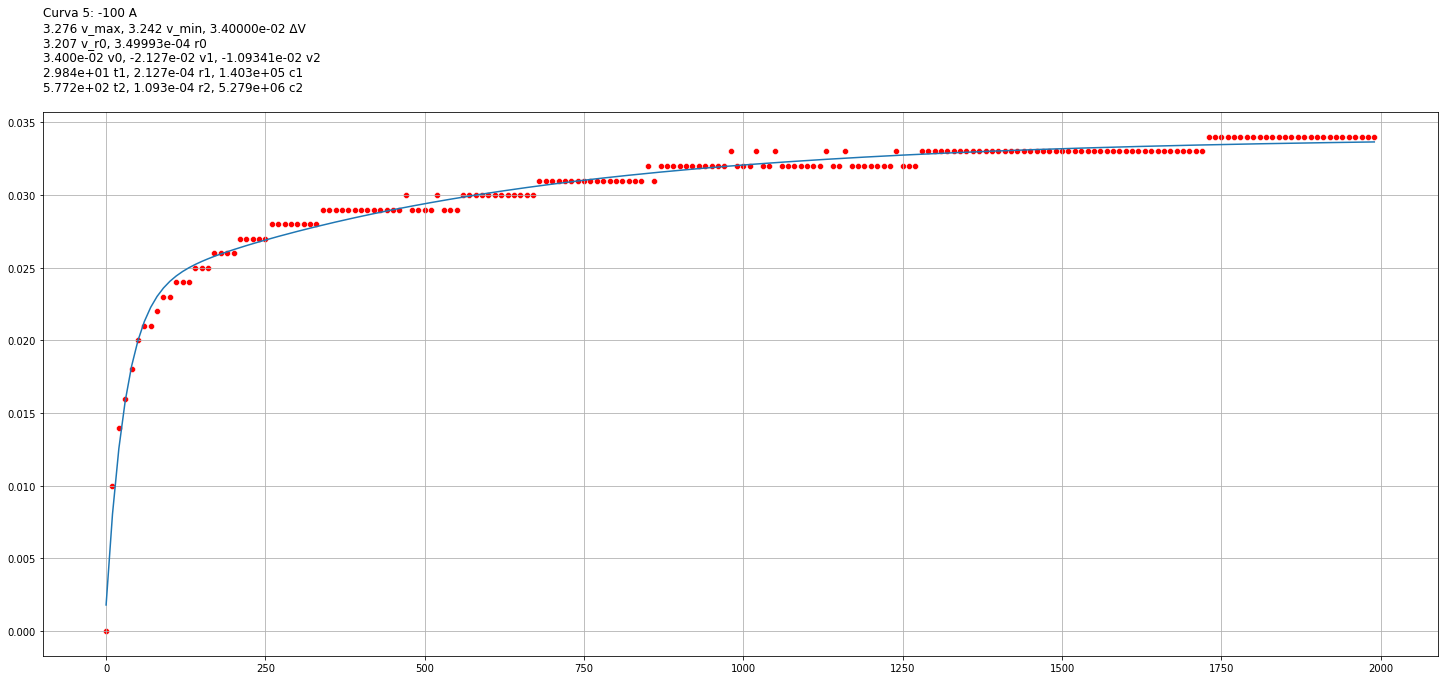

Curva 6: -100 A
3.275 v_max, 3.237 v_min, 3.80000e-02 ΔV
3.2 v_r0, 3.70000e-04 r0
3.870e-02 v0, -2.215e-02 v1, -1.49911e-02 v2
2.917e+01 t1, 2.215e-04 r1, 1.317e+05 c1
7.114e+02 t2, 1.499e-04 r2, 4.745e+06 c2 



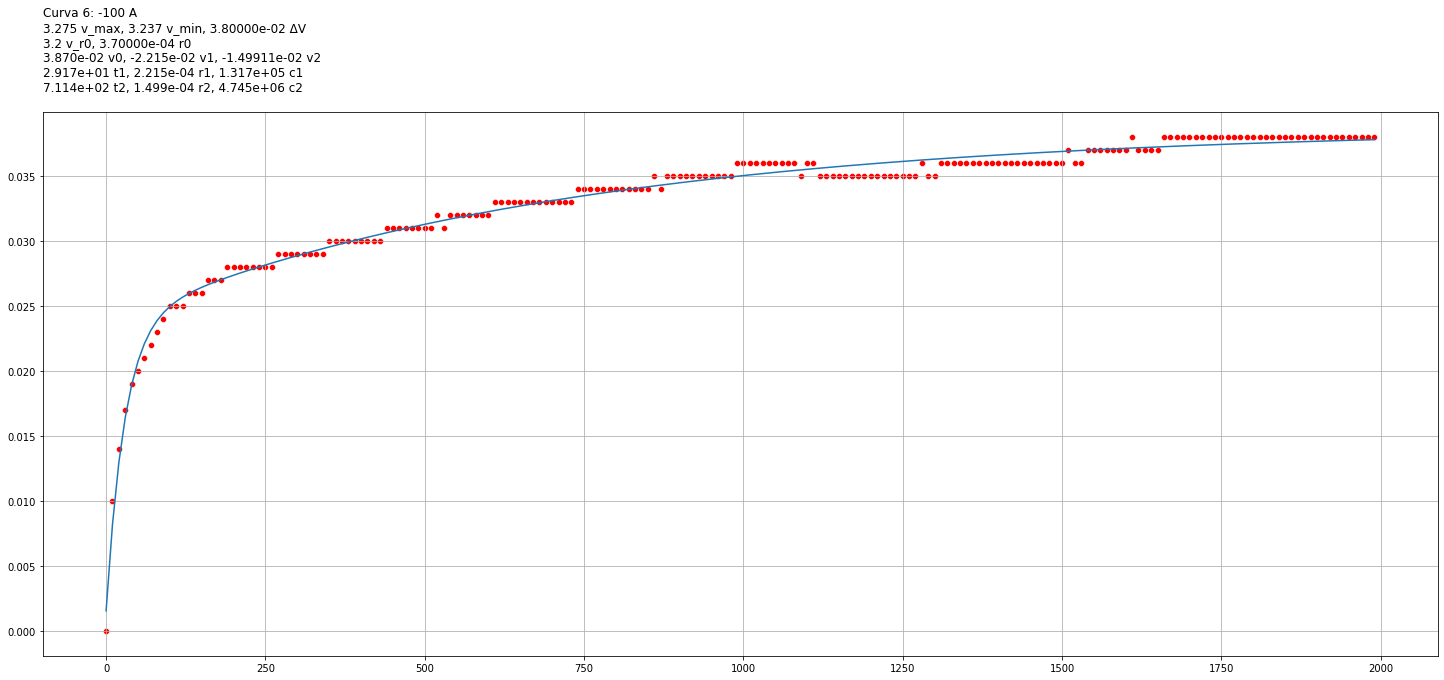

Curva 7: -100 A
3.249 v_max, 3.211 v_min, 3.80000e-02 ΔV
3.174 v_r0, 3.69993e-04 r0
3.749e-02 v0, -2.265e-02 v1, -1.31493e-02 v2
2.699e+01 t1, 2.265e-04 r1, 1.192e+05 c1
6.527e+02 t2, 1.315e-04 r2, 4.964e+06 c2 



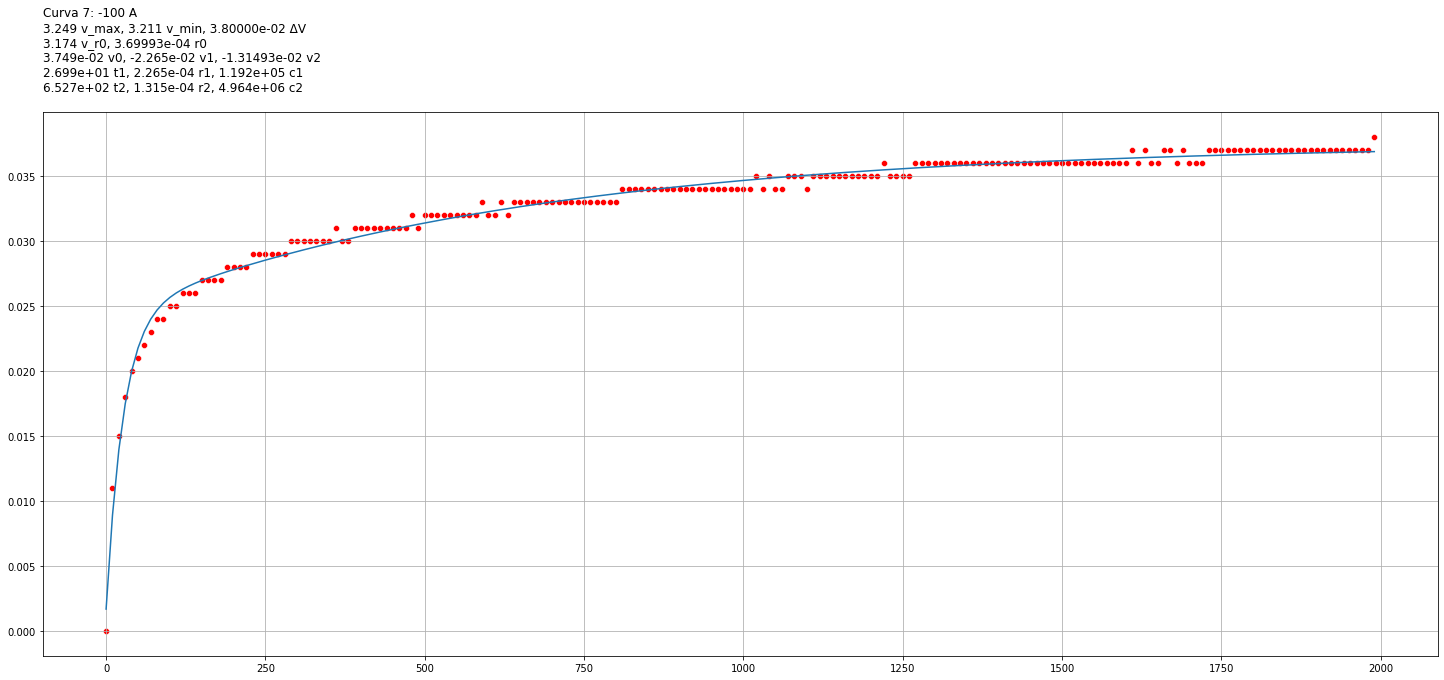

Curva 8: -100 A
3.186 v_max, 3.148 v_min, 3.80000e-02 ΔV
3.11 v_r0, 3.79992e-04 r0
3.732e-02 v0, -2.269e-02 v1, -1.39861e-02 v2
1.505e+01 t1, 2.269e-04 r1, 6.631e+04 c1
2.642e+02 t2, 1.399e-04 r2, 1.889e+06 c2 



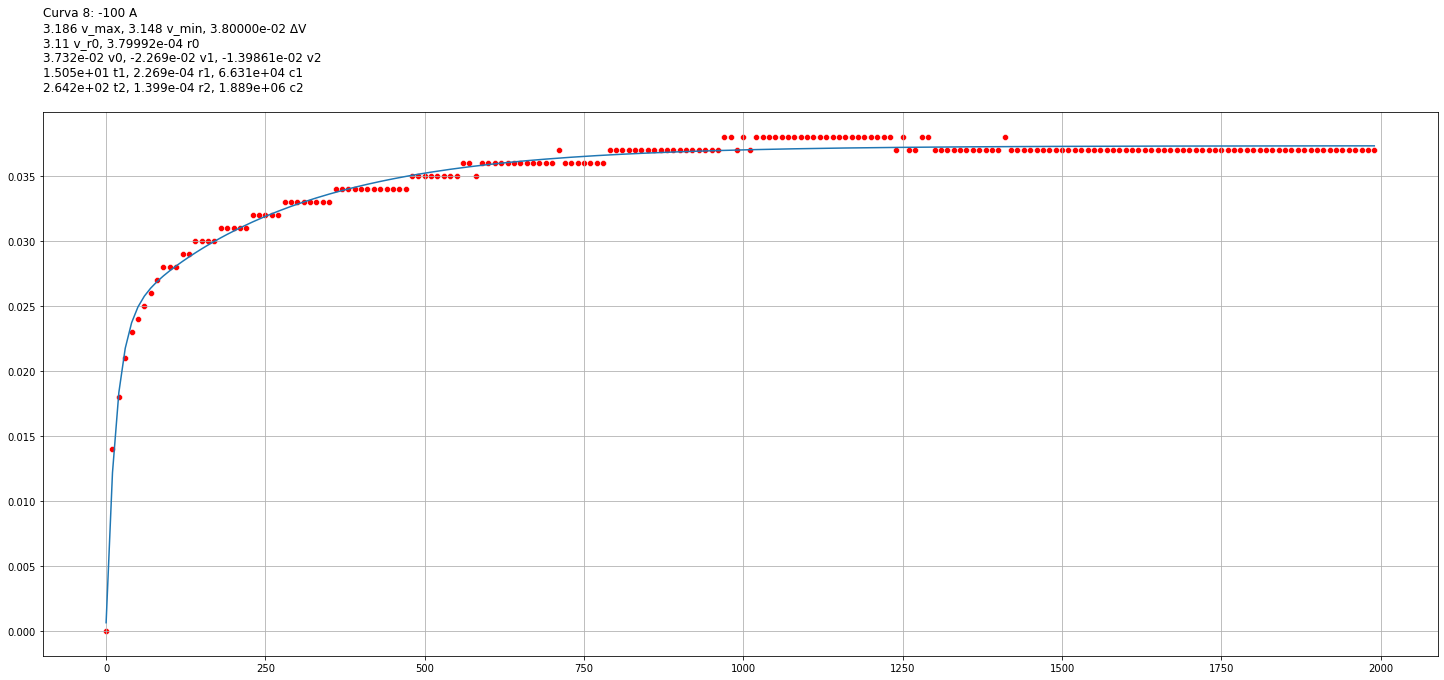

Curva 9: -100 A
3.184 v_max, 3.133 v_min, 5.10000e-02 ΔV
3.092 v_r0, 4.09992e-04 r0
5.047e-02 v0, -3.048e-02 v1, -1.77100e-02 v2
2.306e+01 t1, 3.048e-04 r1, 7.565e+04 c1
5.393e+02 t2, 1.771e-04 r2, 3.045e+06 c2 



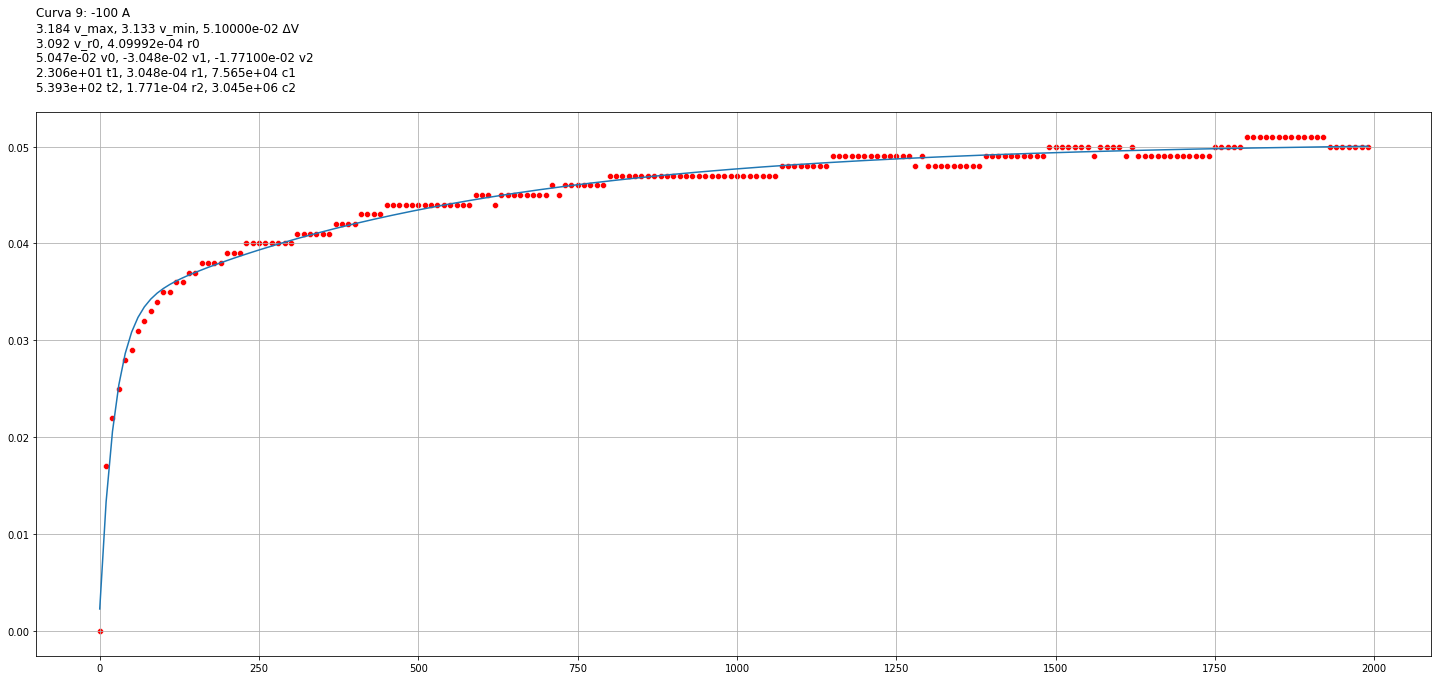

In [6]:
# chute inicial
# v0, v1, v2, 1/tau1, 1/tau2
p0 = np.array([3.2247626343e-02, -2.11580237e-02, -9.80514235e-03,  3.18578442e-02, 2.12246228e-03])+np.random.normal(0, 0.001, 5)

# Limites para os valores dos coeficientes
bounds = ([-1, -100, -100, -1, -1], [100, 1, 1, np.inf, np.inf])

for i, p1 in enumerate(points100A):
    t, v, corrente, vmin, vmax, v_r0 = get_t_v(p1, df_c100)

    # Faz o fitting da curva
    vals, cov = sp.optimize.curve_fit(f=modelo_2rc,
                                        xdata=t,
                                        ydata=v,
                                        p0=p0,
                                        maxfev=30000,
                                        bounds=bounds)
    p0 = vals+np.random.normal(0, 0.001, 5) # usa os valores atuais como o chute inicial para o próximo ponto

    v0 = vals[0]
    v1 = vals[1]
    v2 = vals[2]
    tau1 = 1/vals[3]
    tau2 = 1/vals[4]
    r0 = -(vmin-v_r0)/corrente
    r1 = v1/corrente
    r2 = v2/corrente
    c1 = tau1*corrente/v1
    c2 = tau2*corrente/v2

    title = f'''Curva {i}: {corrente:.0f} A
{vmax} v_max, {vmin} v_min, {vmax-vmin:.5e} ΔV
{v_r0} v_r0, {r0:.5e} r0
{v0:.3e} v0, {v1:.3e} v1, {v2:.5e} v2
{tau1:.3e} t1, {r1:.3e} r1, {c1:.3e} c1
{tau2:.3e} t2, {r2:.3e} r2, {c2:.3e} c2 
'''
    print(title)

    plt.figure(figsize=(25, 10))
    plt.title(title,loc='left')
    sns.scatterplot(y=v, x=t, color='red')
    sns.lineplot(y=modelo_2rc(t, *vals), x=t)
    plt.grid()
    plt.show()
    plt.close()


Curva 0: -28 A
3.342 v_max, 3.332 v_min, 1.00000e-02 ΔV
3.324 v_r0, 2.85694e-04 r0
9.547e-03 v0, -5.697e-03 v1, -3.66882e-03 v2
3.238e-02 t1, 2.034e-04 r1, 1.592e+02 c1
1.772e-03 t2, 1.310e-04 r2, 1.352e+01 c2 



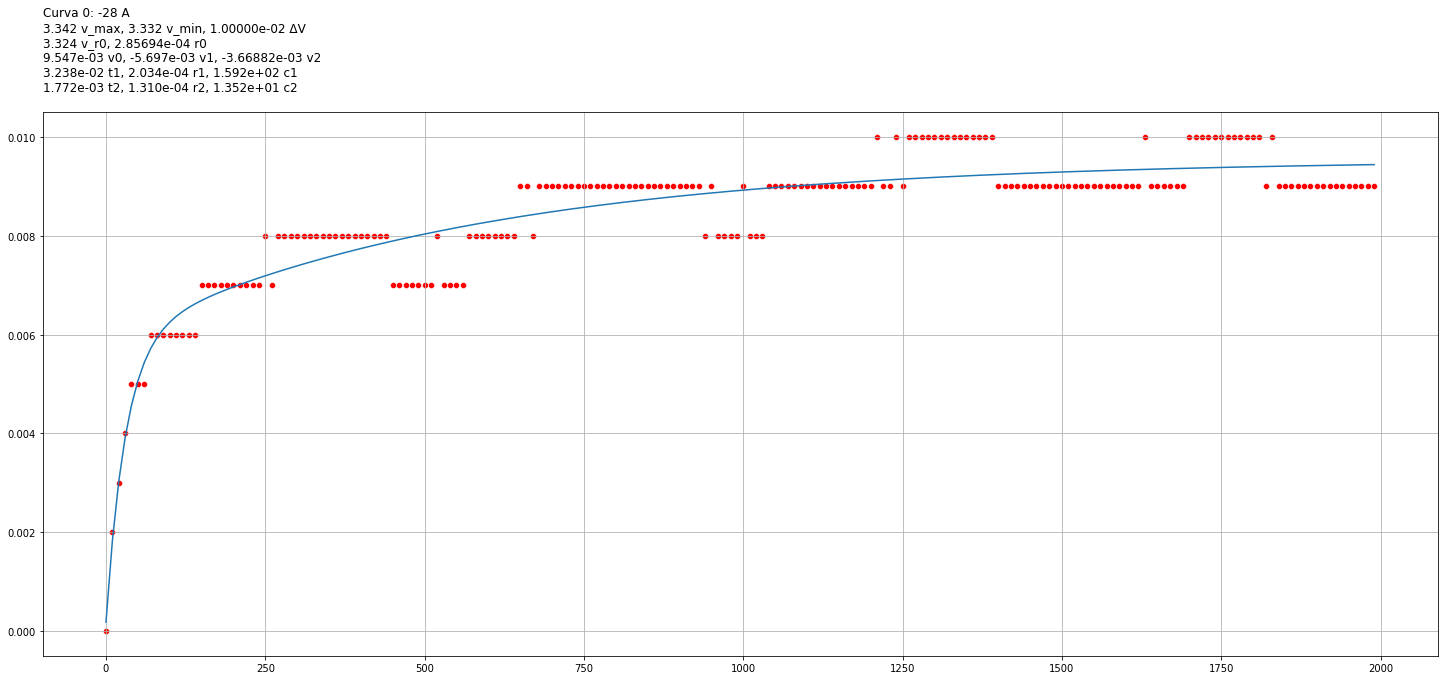

Curva 1: -28 A
3.321 v_max, 3.291 v_min, 3.00000e-02 ΔV
3.291 v_r0, 0.00000e+00 r0
3.036e-02 v0, -1.276e-02 v1, -1.25484e-02 v2
2.598e-02 t1, 4.557e-04 r1, 5.701e+01 c1
1.447e-03 t2, 4.481e-04 r2, 3.229e+00 c2 



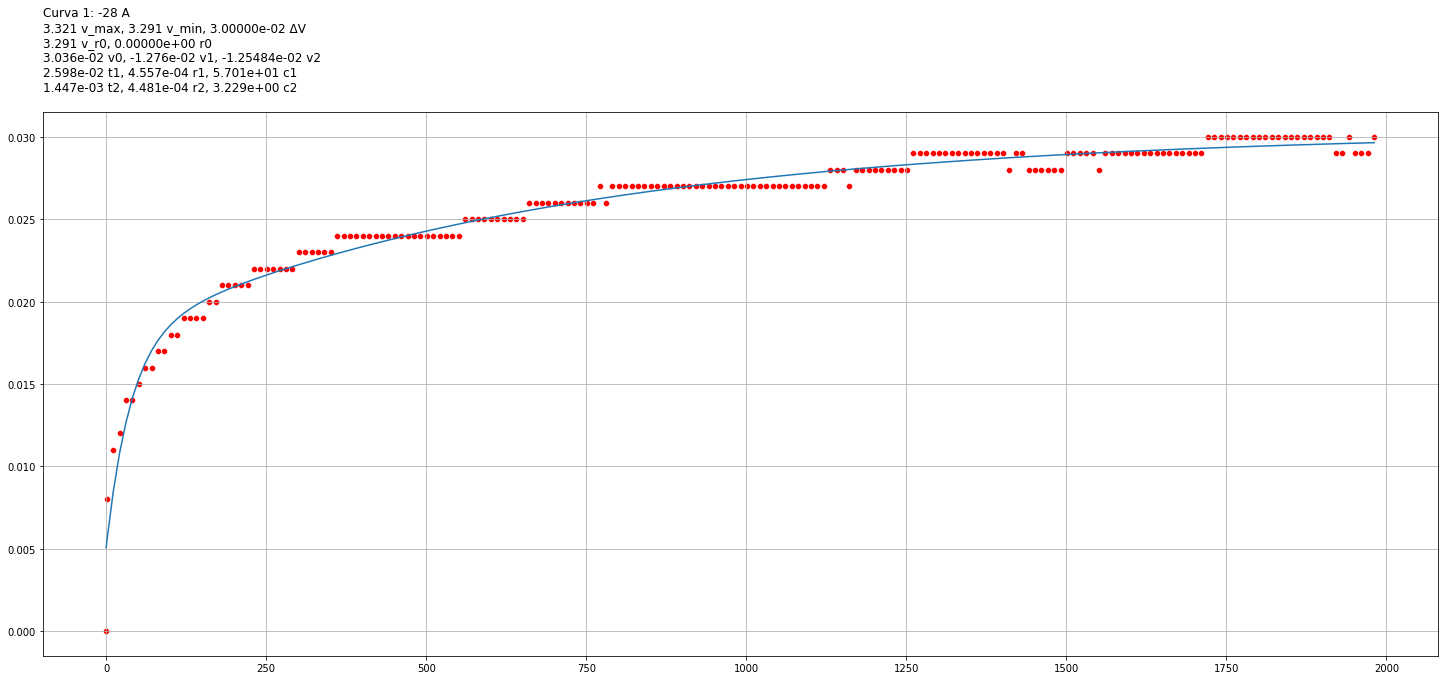

Curva 2: -28 A
3.321 v_max, 3.298 v_min, 2.30000e-02 ΔV
3.289 v_r0, 3.21406e-04 r0
2.271e-02 v0, -1.019e-02 v1, -1.16800e-02 v2
1.795e-02 t1, 3.640e-04 r1, 4.932e+01 c1
1.672e-03 t2, 4.171e-04 r2, 4.008e+00 c2 



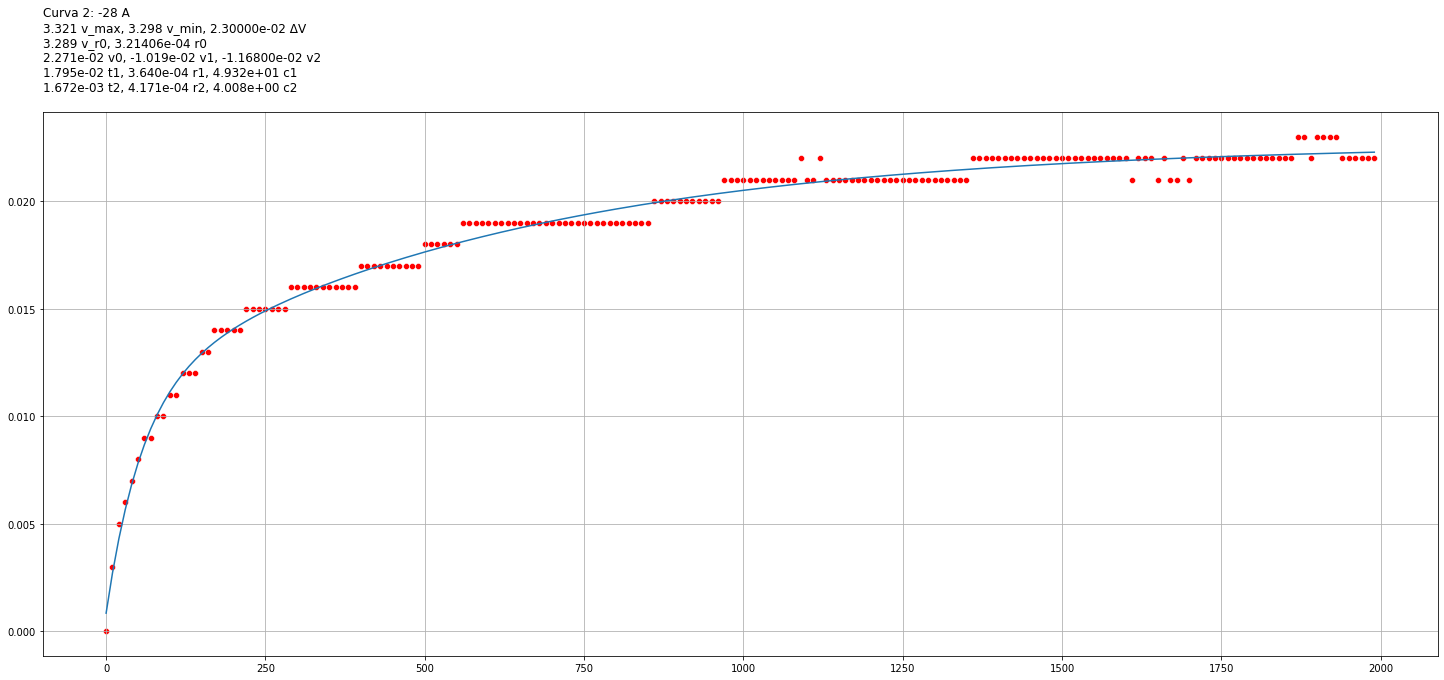

Curva 3: -28 A
3.315 v_max, 3.294 v_min, 2.10000e-02 ΔV
3.285 v_r0, 3.21406e-04 r0
2.191e-02 v0, -1.109e-02 v1, -9.35879e-03 v2
1.255e-02 t1, 3.962e-04 r1, 3.169e+01 c1
1.168e-03 t2, 3.342e-04 r2, 3.494e+00 c2 



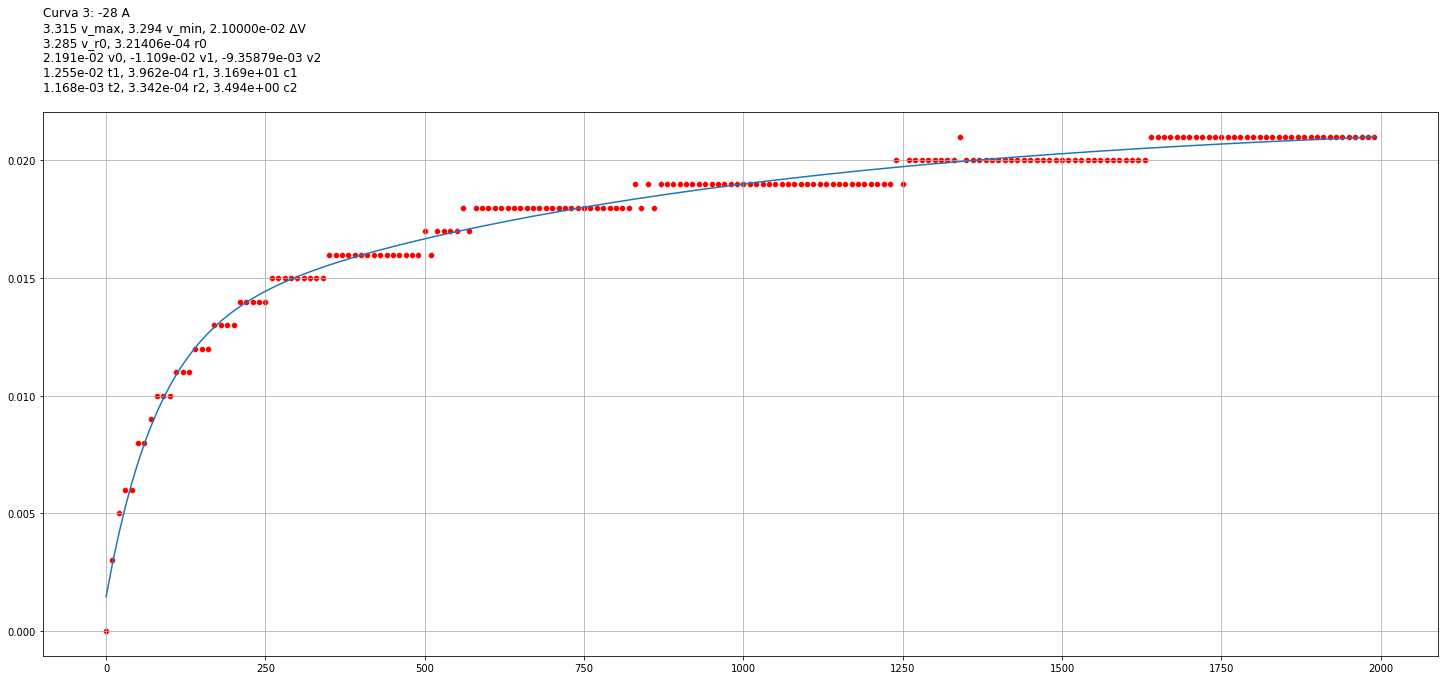

Curva 4: -28 A
3.284 v_max, 3.263 v_min, 2.10000e-02 ΔV
3.254 v_r0, 3.21406e-04 r0
2.151e-02 v0, -1.093e-02 v1, -9.05261e-03 v2
1.372e-02 t1, 3.905e-04 r1, 3.514e+01 c1
1.523e-03 t2, 3.233e-04 r2, 4.711e+00 c2 



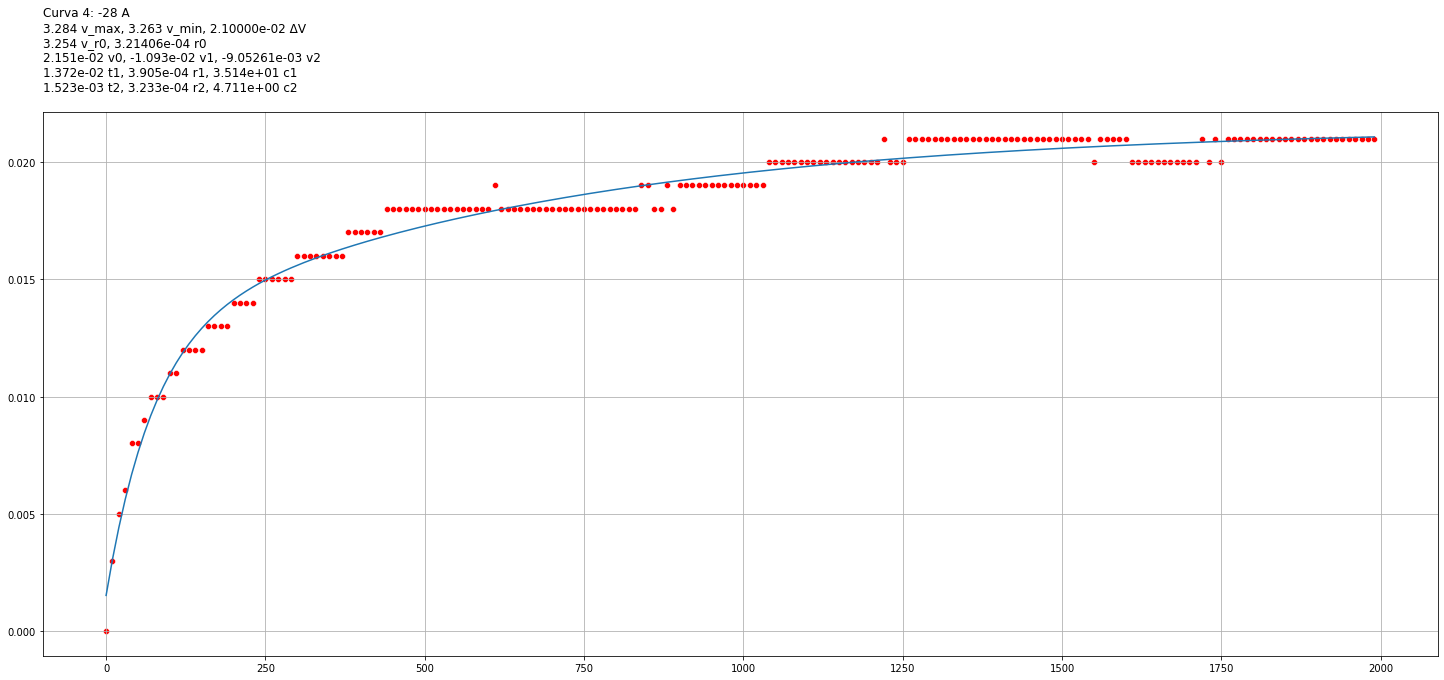

Curva 5: -28 A
3.282 v_max, 3.262 v_min, 2.00000e-02 ΔV
3.253 v_r0, 3.21406e-04 r0
1.941e-02 v0, -7.983e-03 v1, -1.15161e-02 v2
4.500e-02 t1, 2.851e-04 r1, 1.579e+02 c1
2.653e-03 t2, 4.113e-04 r2, 6.452e+00 c2 



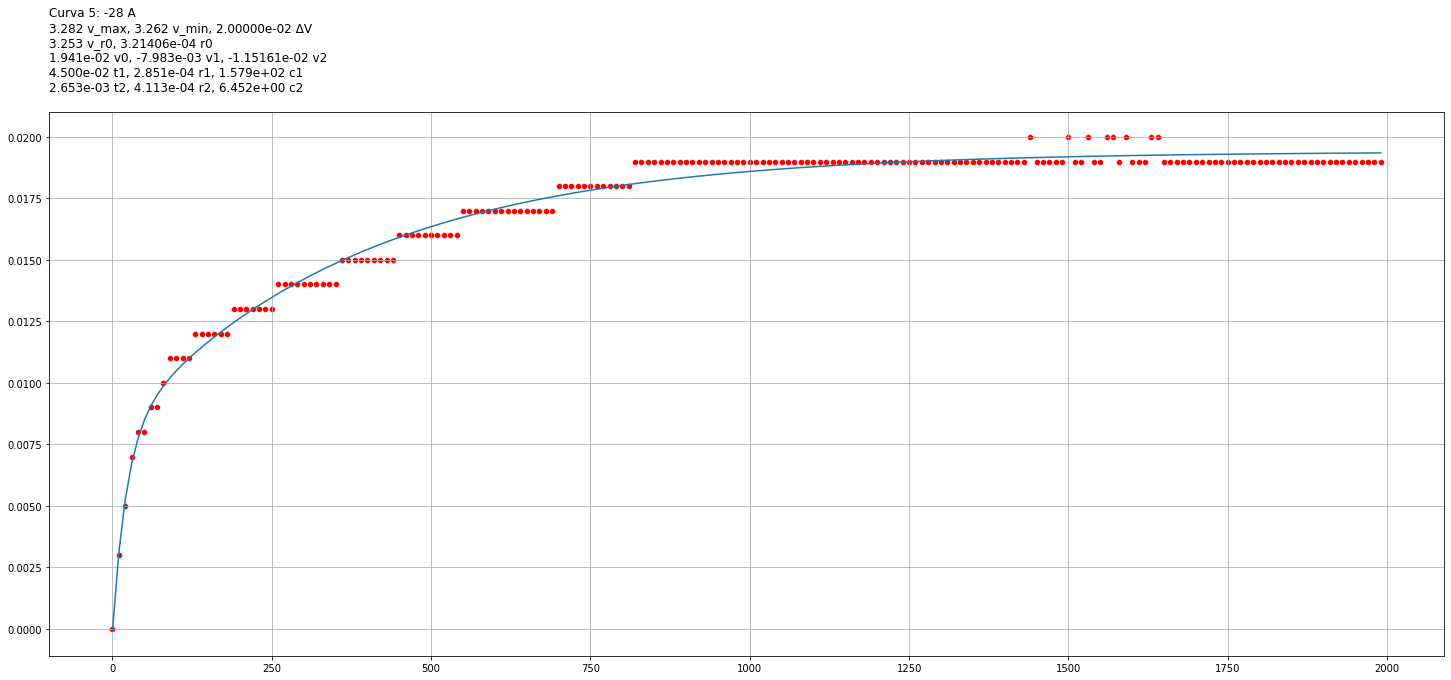

Curva 6: -28 A
3.279 v_max, 3.258 v_min, 2.10000e-02 ΔV
3.25 v_r0, 2.85694e-04 r0
2.121e-02 v0, -1.036e-02 v1, -9.72648e-03 v2
2.211e-02 t1, 3.700e-04 r1, 5.975e+01 c1
1.798e-03 t2, 3.473e-04 r2, 5.177e+00 c2 



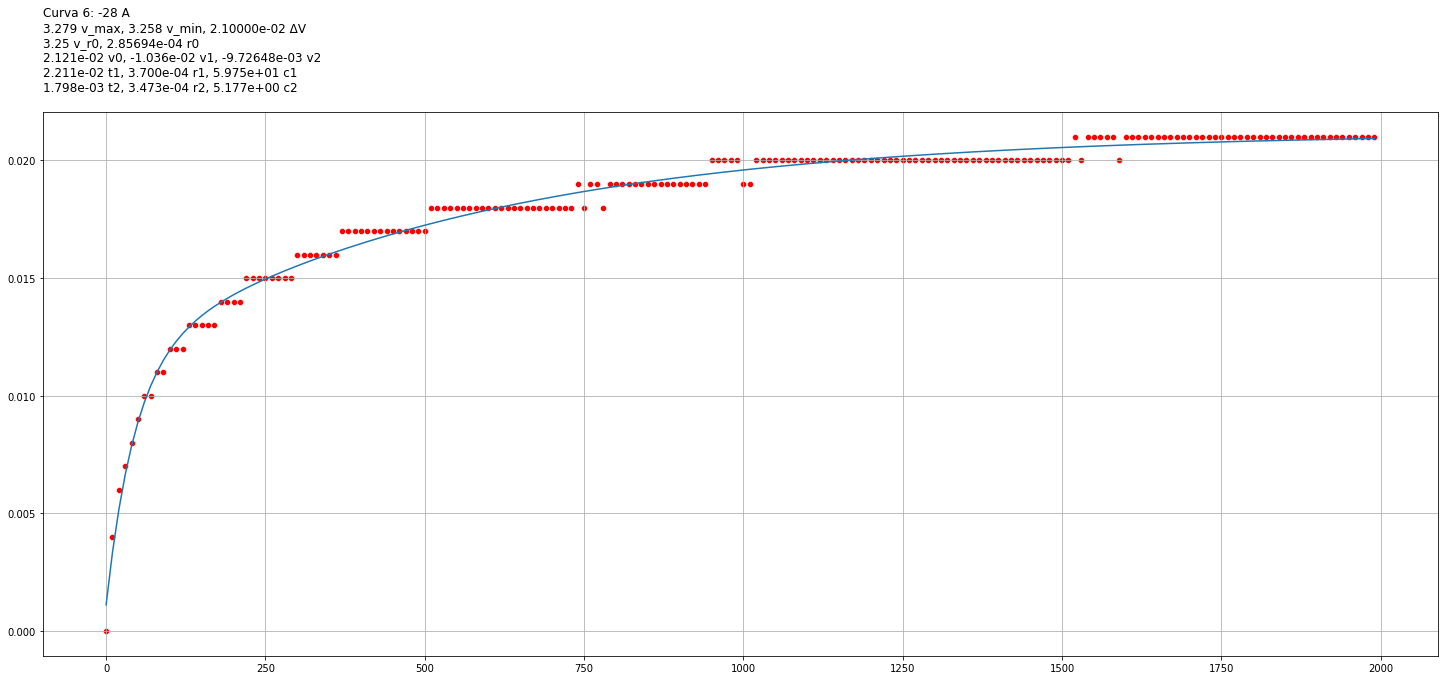

Curva 7: -28 A
3.259 v_max, 3.237 v_min, 2.20000e-02 ΔV
3.228 v_r0, 3.21406e-04 r0
2.077e-02 v0, -9.923e-03 v1, -1.01576e-02 v2
3.602e-02 t1, 3.544e-04 r1, 1.017e+02 c1
3.214e-03 t2, 3.627e-04 r2, 8.860e+00 c2 



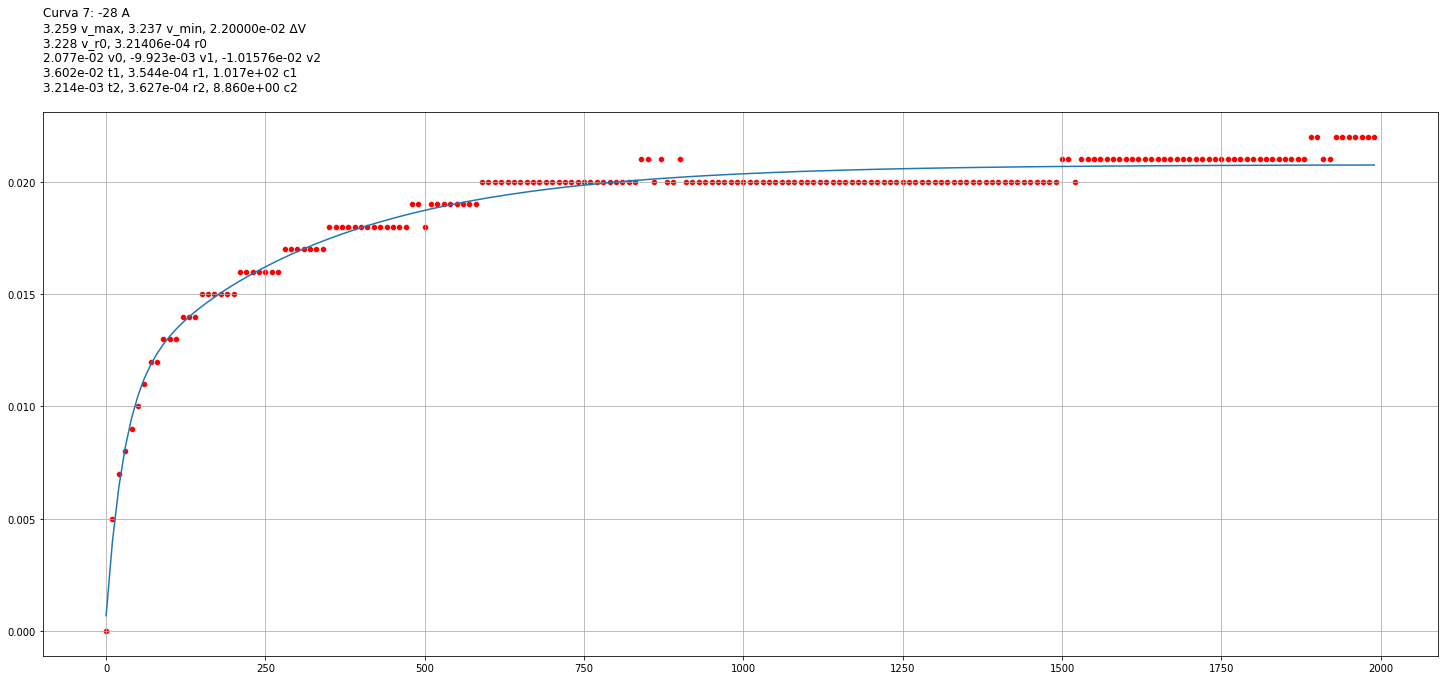

Curva 8: -28 A
3.206 v_max, 3.181 v_min, 2.50000e-02 ΔV
3.171 v_r0, 3.57117e-04 r0
2.363e-02 v0, -1.056e-02 v1, -1.29875e-02 v2
5.161e-02 t1, 3.771e-04 r1, 1.369e+02 c1
3.562e-03 t2, 4.638e-04 r2, 7.679e+00 c2 



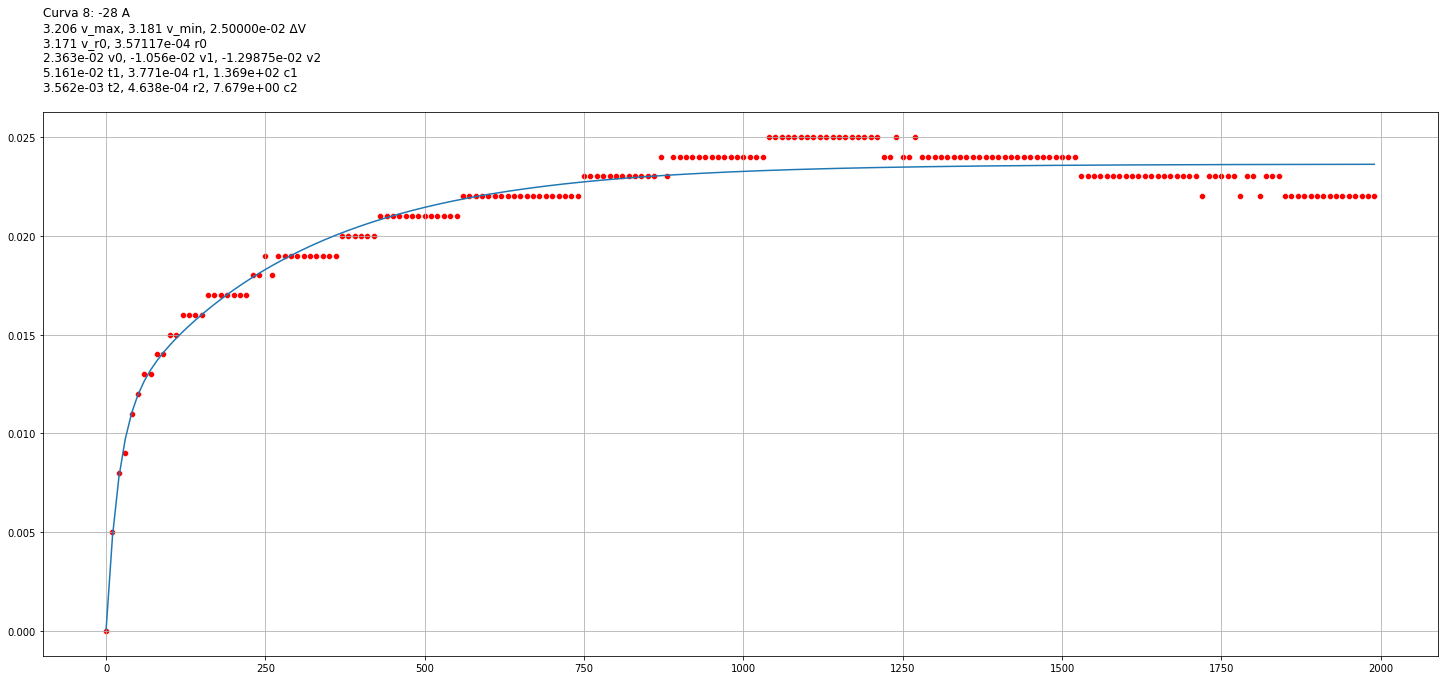

Curva 9: -28 A
3.19 v_max, 3.163 v_min, 2.70000e-02 ΔV
3.153 v_r0, 3.57117e-04 r0
2.774e-02 v0, -1.392e-02 v1, -1.27074e-02 v2
3.133e-02 t1, 4.971e-04 r1, 6.303e+01 c1
1.201e-03 t2, 4.538e-04 r2, 2.647e+00 c2 



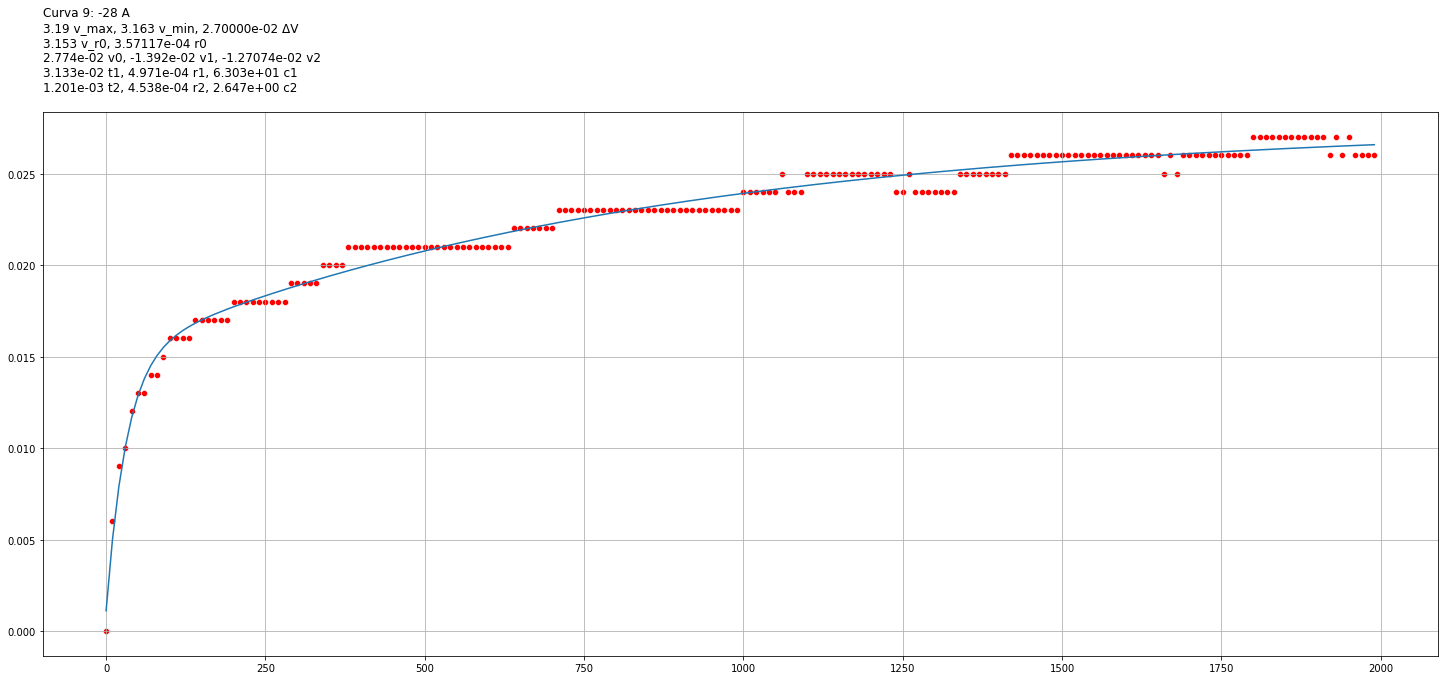

In [7]:
# Limites para os valores dos coeficientes
bounds = ([-1, -100, -100, -1, -1], [100, 1, 1, 100, 100])

for i, p1 in enumerate(points28A):
    t, v, corrente, vmin, vmax, v_r0 = get_t_v(p1, df_c100)

    # Faz o fitting da curva
    vals, cov = sp.optimize.curve_fit(f=modelo_2rc,
                                        xdata=t,
                                        ydata=v,
                                        p0=p0,
                                        maxfev=30000,
                                        bounds=bounds)
    p0 = vals+np.random.normal(0, 0.001, 5) # usa os valores atuais como o chute inicial para o próximo ponto

    v0 = vals[0]
    v1 = vals[1]
    v2 = vals[2]
    tau1 = vals[3]
    tau2 = vals[4]
    r0 = -(vmin-v_r0)/corrente
    r1 = vals[1]/corrente
    r2 = vals[2]/corrente
    c1 = vals[3]*corrente/vals[1]
    c2 = vals[4]*corrente/vals[2]

    title = f'''Curva {i}: {corrente:.0f} A
{vmax} v_max, {vmin} v_min, {vmax-vmin:.5e} ΔV
{v_r0} v_r0, {r0:.5e} r0
{v0:.3e} v0, {v1:.3e} v1, {v2:.5e} v2
{tau1:.3e} t1, {r1:.3e} r1, {c1:.3e} c1
{tau2:.3e} t2, {r2:.3e} r2, {c2:.3e} c2 
'''
    print(title)

    plt.figure(figsize=(25, 10))
    plt.title(title,loc='left')
    sns.scatterplot(y=v, x=t, color='red')
    sns.lineplot(y=modelo_2rc(t, *vals), x=t)
    plt.grid()
    plt.show()
    plt.close()


Curva 0: -3 A
3.419 v_max, 3.414 v_min, 5.00000e-03 ΔV
3.414 v_r0, 0.00000e+00 r0
2.449e-01 v0, -3.048e-03 v1, -2.41768e-01 v2
3.133e-02 t1, 1.015e-03 r1, 3.086e+01 c1
9.136e-07 t2, 8.054e-02 r2, 1.134e-05 c2 



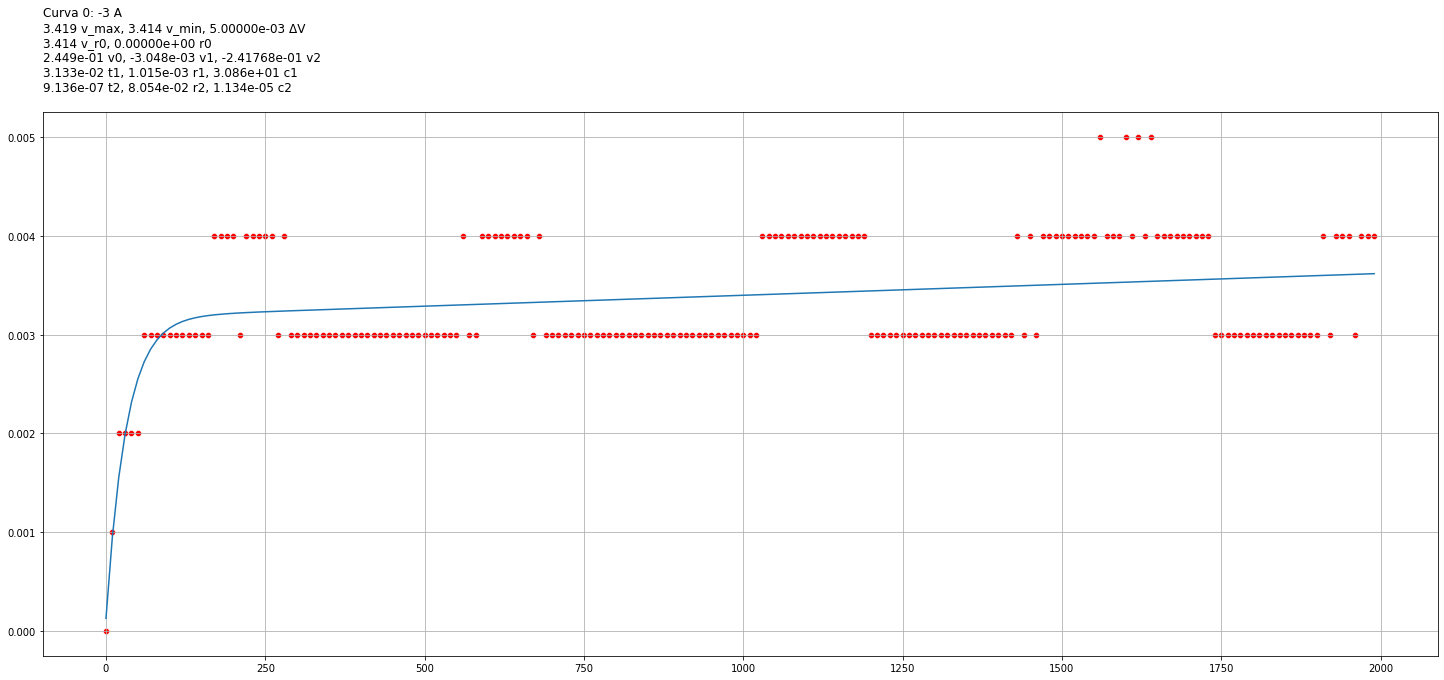

Curva 1: -3 A
3.323 v_max, 3.32 v_min, 3.00000e-03 ΔV
3.319 v_r0, 3.33111e-04 r0
2.895e-03 v0, -2.584e-07 v1, -3.04817e-03 v2
-3.563e-03 t1, 8.606e-08 r1, -4.140e+04 c1
3.150e-03 t2, 1.015e-03 r2, 3.102e+00 c2 



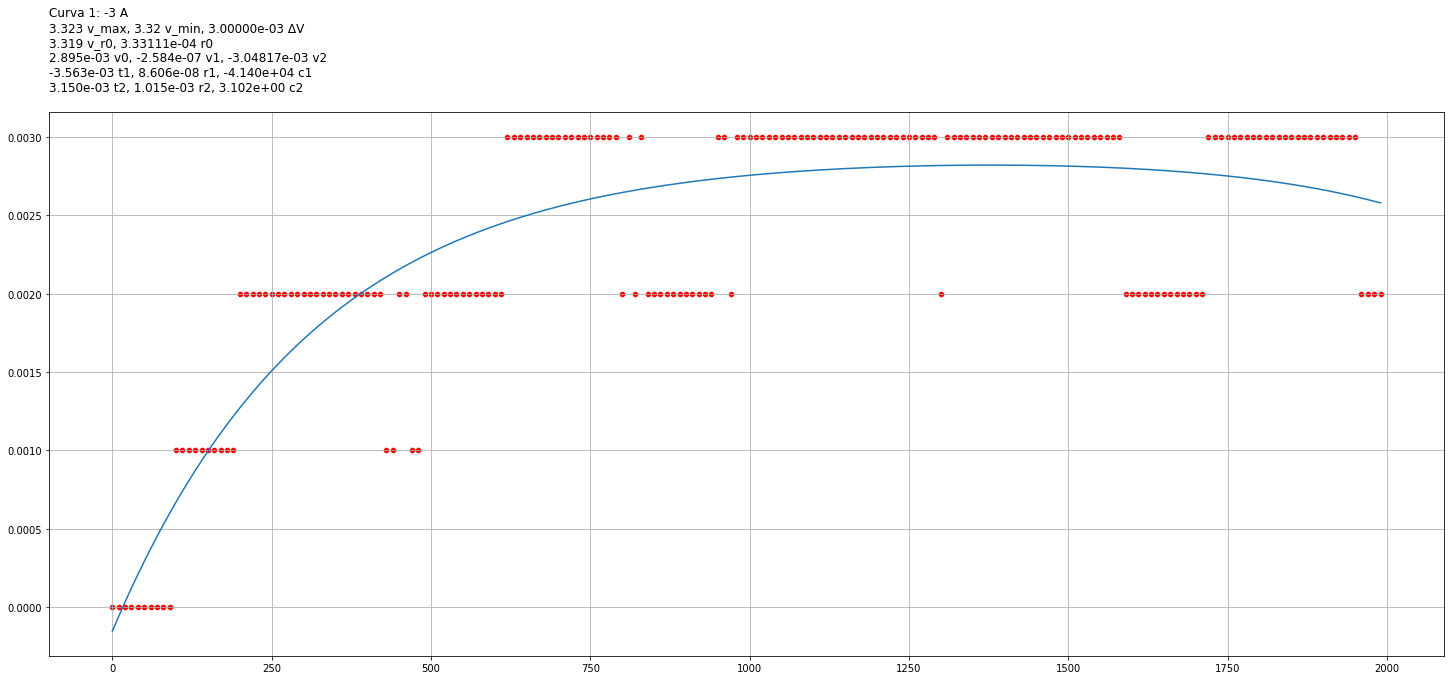

Curva 2: -3 A
3.322 v_max, 3.319 v_min, 3.00000e-03 ΔV
3.319 v_r0, 0.00000e+00 r0
1.255e-03 v0, 2.344e-01 v1, -2.35149e-01 v2
1.742e-03 t1, -7.808e-02 r1, -2.231e-02 c1
1.776e-03 t2, 7.833e-02 r2, 2.267e-02 c2 



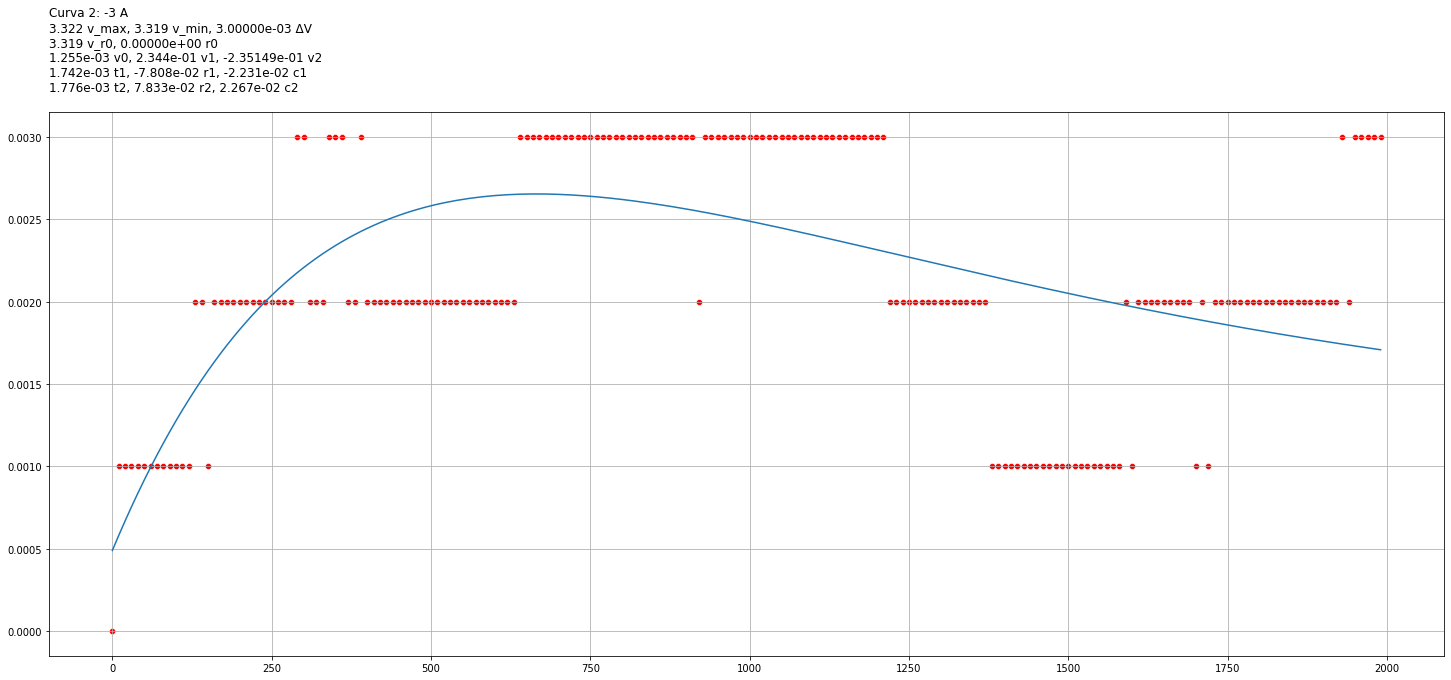

Curva 3: -3 A
3.32 v_max, 3.316 v_min, 4.00000e-03 ΔV
3.316 v_r0, 0.00000e+00 r0
1.930e-03 v0, 2.344e-01 v1, -2.35268e-01 v2
1.033e-03 t1, -7.809e-02 r1, -1.323e-02 c1
1.042e-03 t2, 7.837e-02 r2, 1.330e-02 c2 



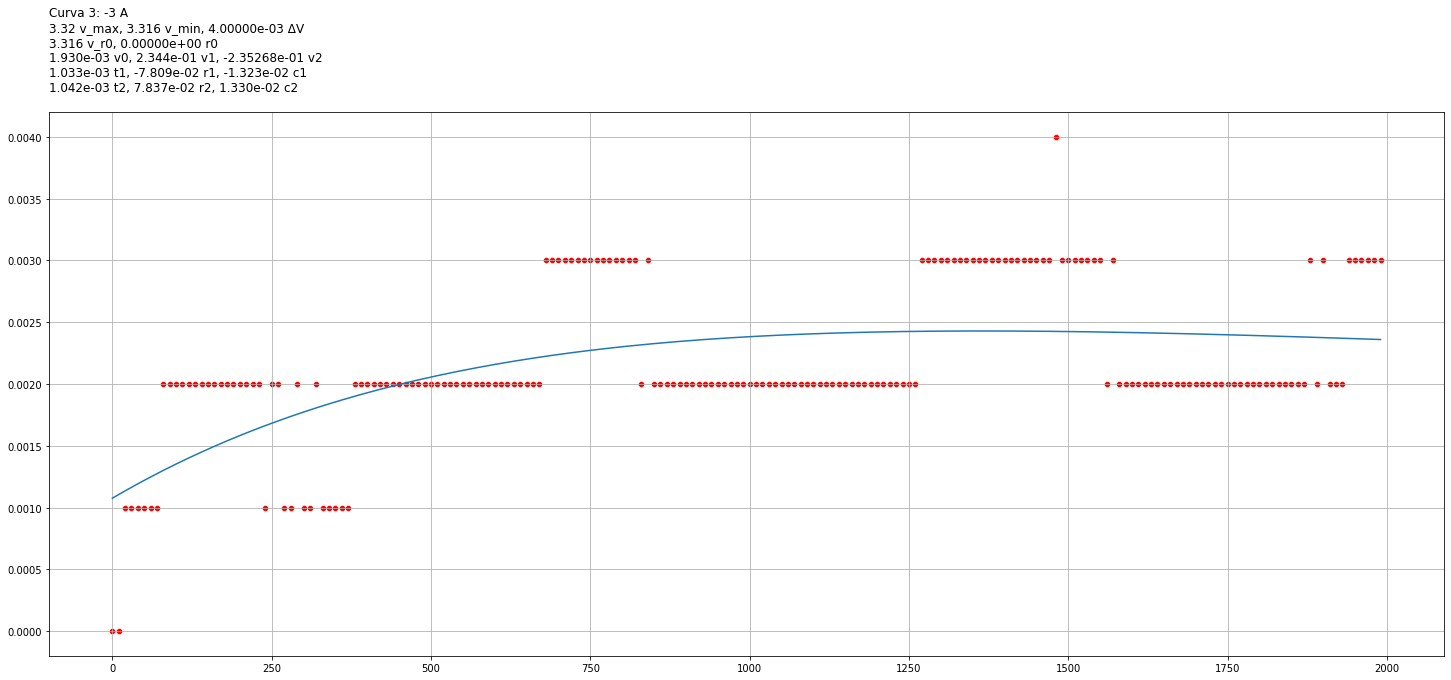

Curva 4: -3 A
3.287 v_max, 3.284 v_min, 3.00000e-03 ΔV
3.283 v_r0, 3.33111e-04 r0
2.497e-03 v0, 2.337e-01 v1, -2.36108e-01 v2
6.310e-03 t1, -7.785e-02 r1, -8.105e-02 c1
6.310e-03 t2, 7.865e-02 r2, 8.022e-02 c2 



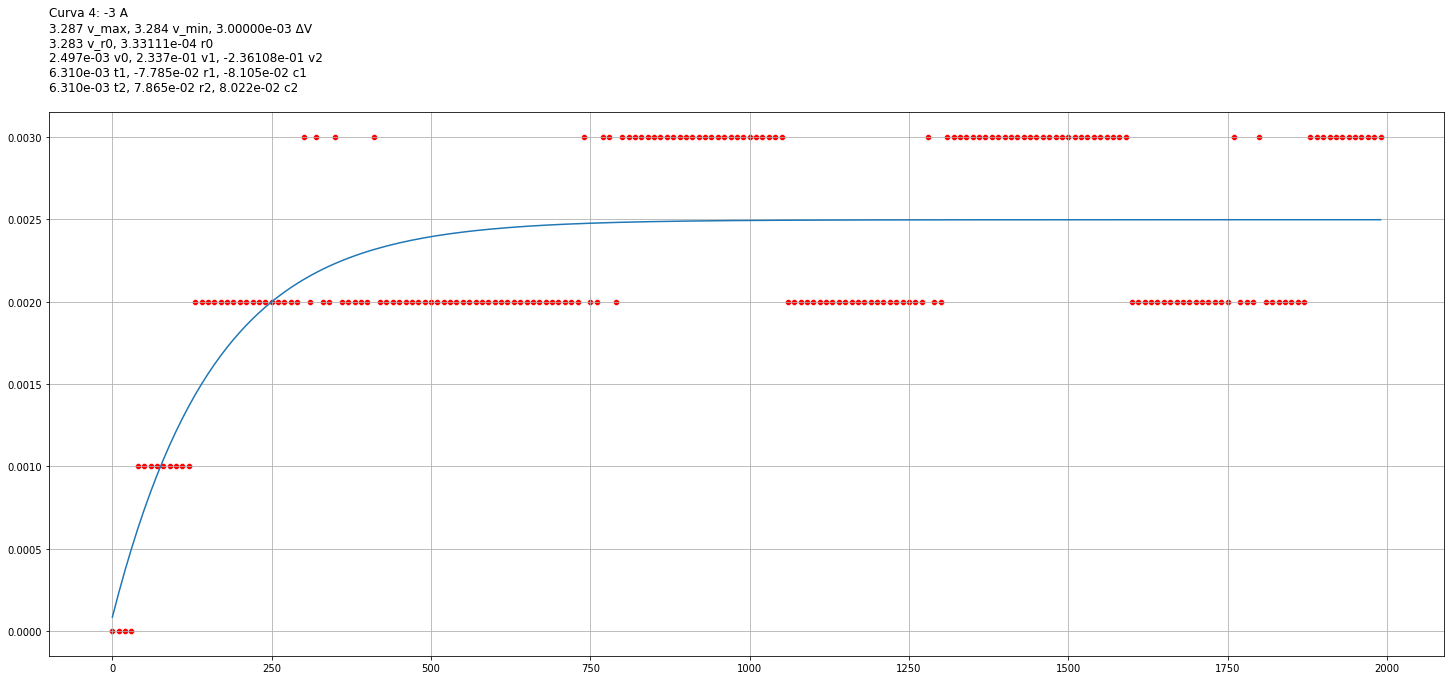

Curva 5: -3 A
3.284 v_max, 3.281 v_min, 3.00000e-03 ΔV
3.281 v_r0, 0.00000e+00 r0
2.161e-03 v0, 2.368e-01 v1, -2.39167e-01 v2
2.504e-03 t1, -7.888e-02 r1, -3.175e-02 c1
2.540e-03 t2, 7.967e-02 r2, 3.188e-02 c2 



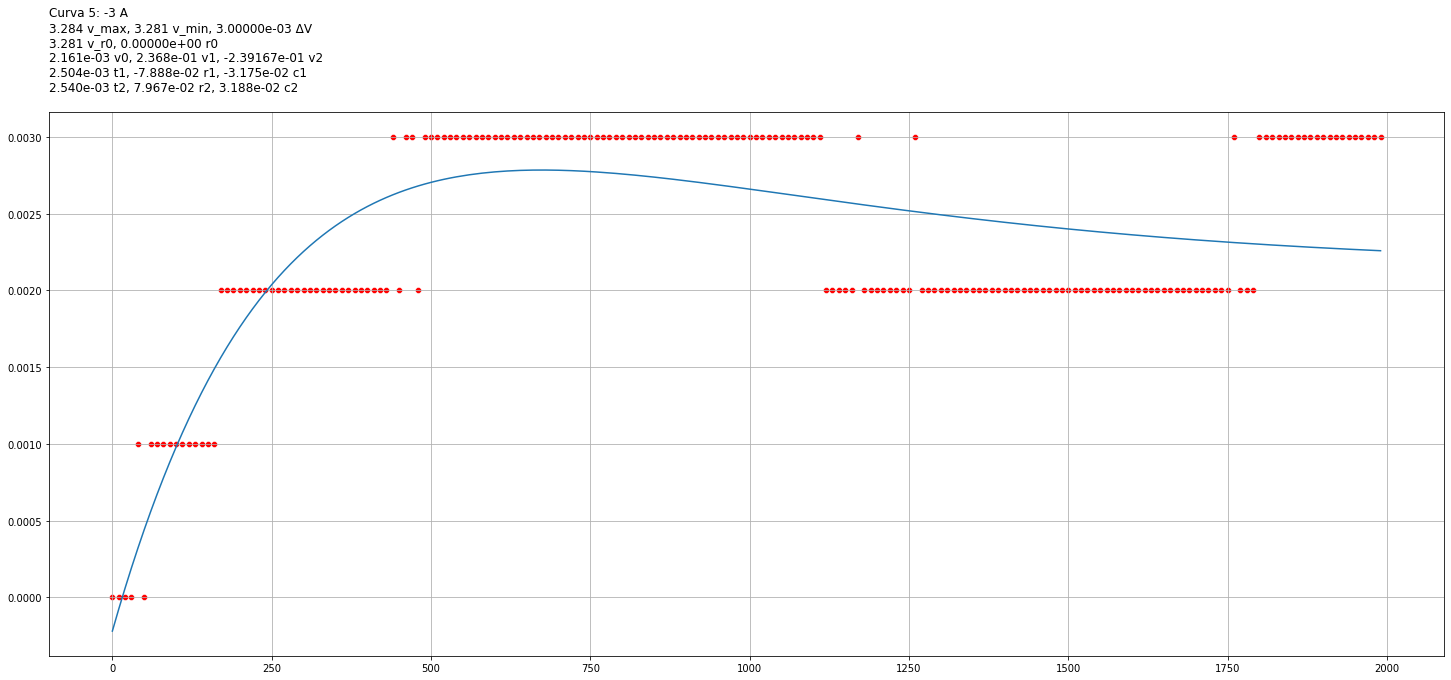

Curva 6: -3 A
3.283 v_max, 3.28 v_min, 3.00000e-03 ΔV
3.281 v_r0, -3.33111e-04 r0
2.977e-03 v0, 2.381e-01 v1, -2.40586e-01 v2
3.505e-03 t1, -7.933e-02 r1, -4.418e-02 c1
3.522e-03 t2, 8.014e-02 r2, 4.395e-02 c2 



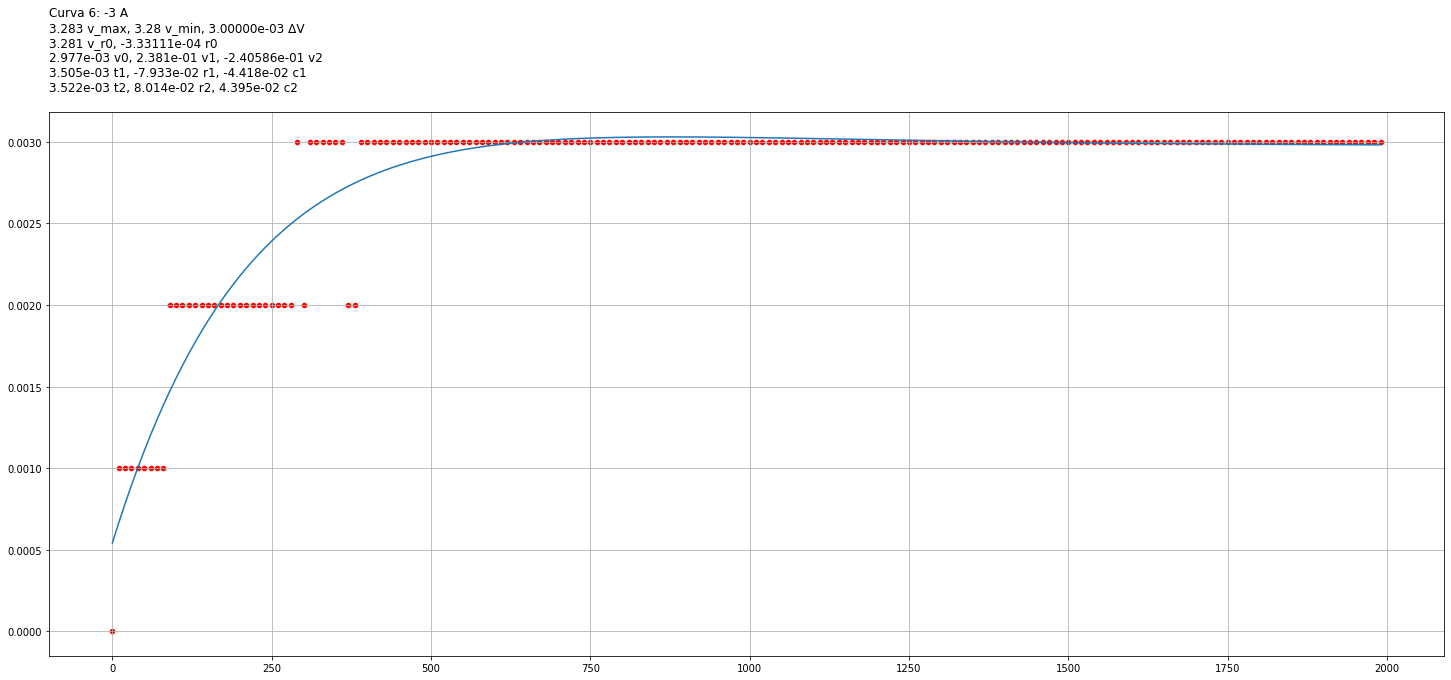

Curva 7: -3 A
3.263 v_max, 3.26 v_min, 3.00000e-03 ΔV
3.259 v_r0, 3.33111e-04 r0
1.710e-03 v0, 2.961e-01 v1, -2.97520e-01 v2
1.096e-02 t1, -9.862e-02 r1, -1.111e-01 c1
1.084e-02 t2, 9.911e-02 r2, 1.093e-01 c2 



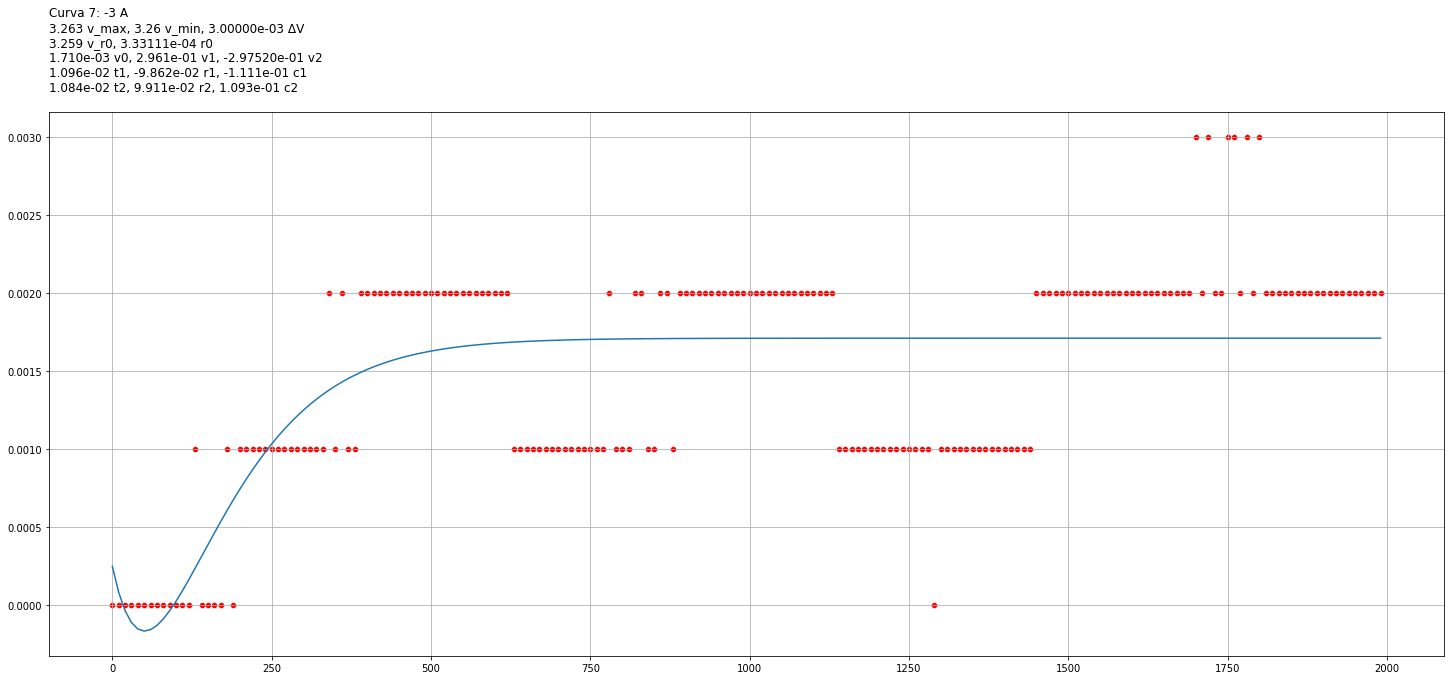

Curva 8: -3 A
3.197 v_max, 3.176 v_min, 2.10000e-02 ΔV
3.176 v_r0, 0.00000e+00 r0
2.092e-02 v0, 3.008e-01 v1, -3.20635e-01 v2
1.689e-03 t1, -1.002e-01 r1, -1.686e-02 c1
1.689e-03 t2, 1.068e-01 r2, 1.582e-02 c2 



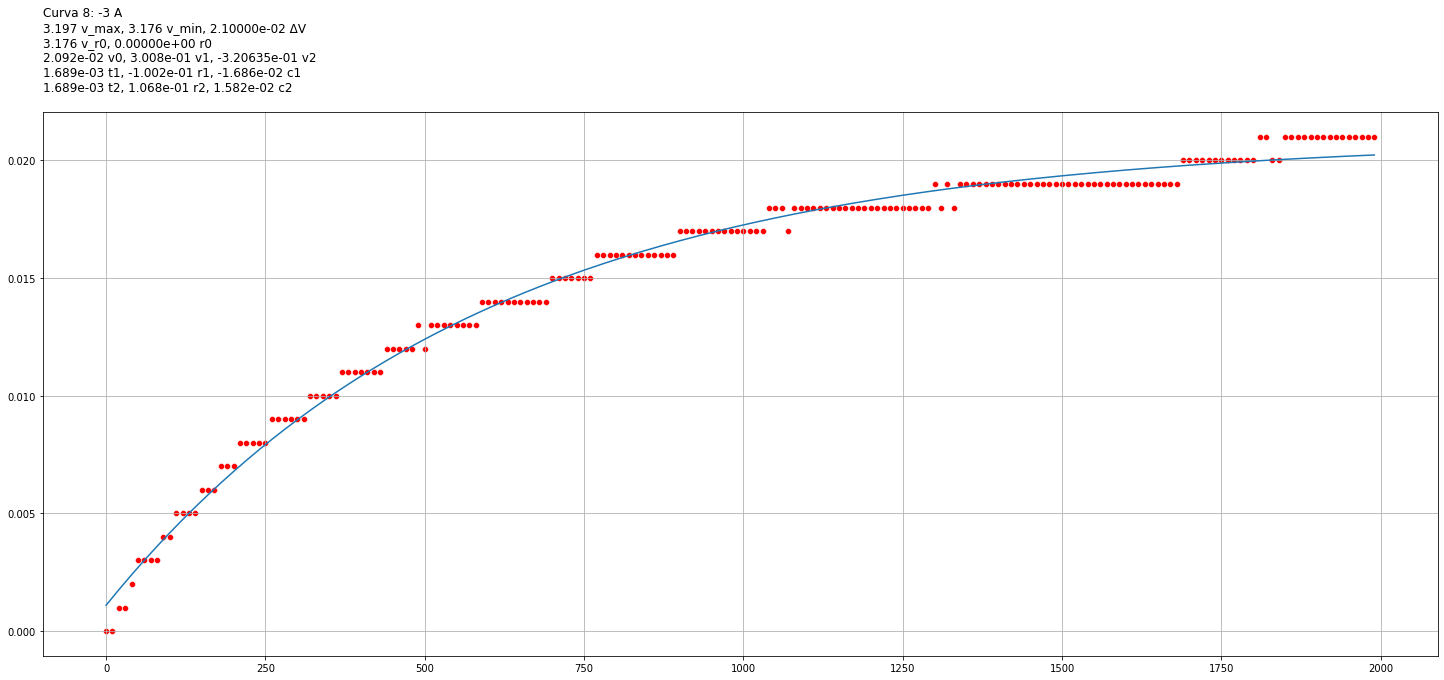

Curva 9: -3 A
3.197 v_max, 3.194 v_min, 3.00000e-03 ΔV
3.194 v_r0, 0.00000e+00 r0
2.931e-03 v0, 3.134e-01 v1, -3.15531e-01 v2
2.583e-03 t1, -1.044e-01 r1, -2.474e-02 c1
2.583e-03 t2, 1.051e-01 r2, 2.457e-02 c2 



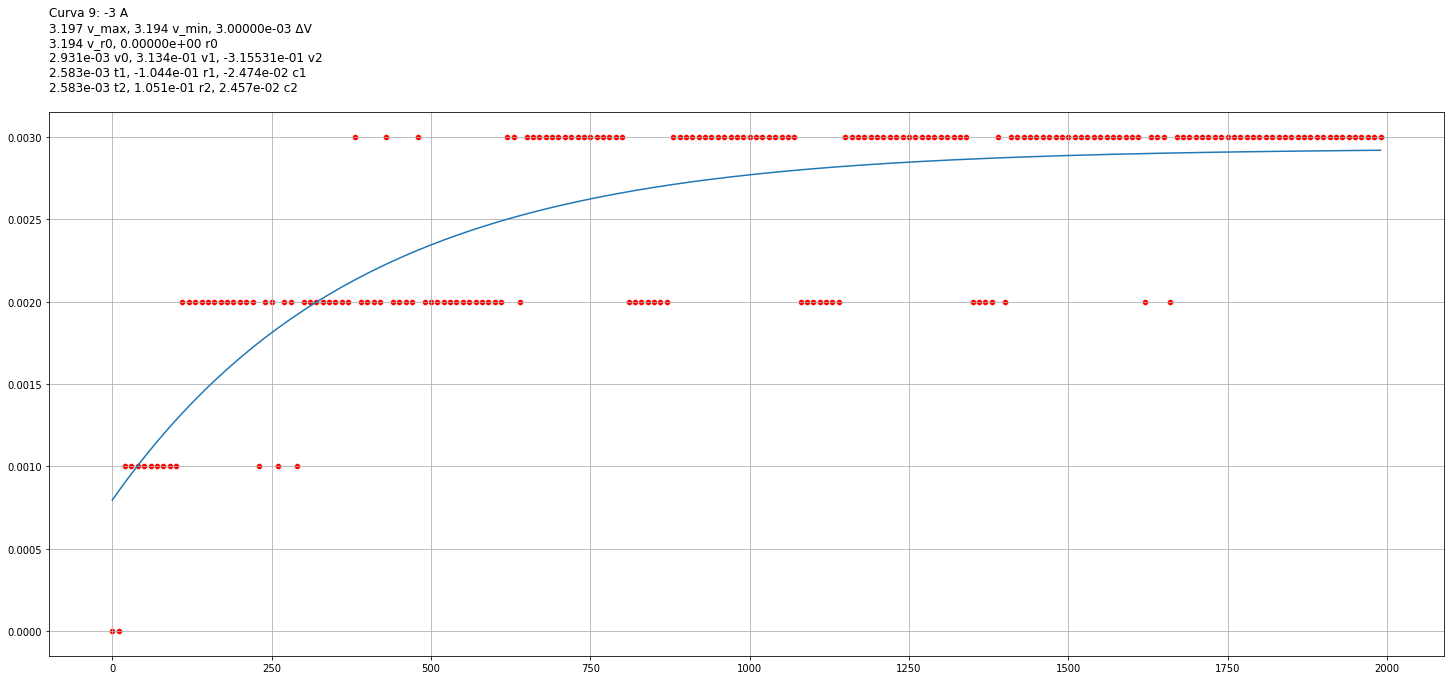

In [8]:
# Limites para os valores dos coeficientes
bounds = ([-1, -100, -100, -1, -1], [100, 1, 1, 100, 100])

for i, p1 in enumerate(points3A):
    t, v, corrente, vmin, vmax, v_r0 = get_t_v(p1, df_c100)

    # Faz o fitting da curva
    vals, cov = sp.optimize.curve_fit(f=modelo_2rc,
                                        xdata=t,
                                        ydata=v,
                                        p0=p0,
                                        maxfev=30000,
                                        bounds=bounds)
    p0 = vals+np.random.normal(0, 0.001, 5) # usa os valores atuais como o chute inicial para o próximo ponto

    v0 = vals[0]
    v1 = vals[1]
    v2 = vals[2]
    tau1 = vals[3]
    tau2 = vals[4]
    r0 = -(vmin-v_r0)/corrente
    r1 = vals[1]/corrente
    r2 = vals[2]/corrente
    c1 = vals[3]*corrente/vals[1]
    c2 = vals[4]*corrente/vals[2]

    title = f'''Curva {i}: {corrente:.0f} A
{vmax} v_max, {vmin} v_min, {vmax-vmin:.5e} ΔV
{v_r0} v_r0, {r0:.5e} r0
{v0:.3e} v0, {v1:.3e} v1, {v2:.5e} v2
{tau1:.3e} t1, {r1:.3e} r1, {c1:.3e} c1
{tau2:.3e} t2, {r2:.3e} r2, {c2:.3e} c2 
'''
    print(title)

    plt.figure(figsize=(25, 10))
    plt.title(title,loc='left')
    sns.scatterplot(y=v, x=t, color='red')
    sns.lineplot(y=modelo_2rc(t, *vals), x=t)
    plt.grid()
    plt.show()
    plt.close()
